# -------------------------------------Searching & Sorting-------------------------------------
**==============================================================================**
# Assembled By - Praveen Kumar Sharma
# Source - GeeksForGeeks
**==============================================================================**

In [1]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **48. Majority Element**
https://www.geeksforgeeks.org/majority-element/

In [2]:
/*
Write a function which takes an array 
and prints the majority element (if it exists), 
otherwise prints “No Majority Element”. 
A majority element in an array A[] of size n is an element that appears more than n/2 times 
(and hence there is at most one such element).
*/

In [3]:
/*
Examples :

Input : {3, 3, 4, 2, 4, 4, 2, 4, 4}
Output : 4 

Input : {3, 3, 4, 2, 4, 4, 2, 4}
Output : No Majority Element
*/

In [4]:
/*
METHOD 1 (Basic)

The basic solution is to have two loops and keep track of maximum count for all different elements. 
If maximum count becomes greater than n/2 then break the loops and return the element having maximum count. 
If maximum count doesn’t become more than n/2 then majority element doesn’t exist.

Time Complexity : O(n*n).
Auxiliary Space : O(1).
*/

In [5]:
/*
METHOD 2 (Using Binary Search Tree)

Insert elements in BST one by one and if an element is already present then increment the count of the node. 
At any stage, if count of a node becomes more than n/2 then return.
The method works well for the cases where n/2+1 occurrences of the majority element is present in the starting of the array, 
for example {1, 1, 1, 1, 1, 2, 3, 4}.

Time Complexity : If a Binary Search Tree is used then time complexity will be O(n^2). 
                  If a self-balancing-binary-search tree is used then O(nlogn)
Auxiliary Space : O(n)
*/

In [6]:
/*
METHOD 3 (Using Moore’s Voting Algorithm)
Time Complexity: O(n)
Auxiliary Space : O(1)

This is a two step process.

NOTE :  This Method only works when we are given that majority element do exist in the array , 
        otherwise this method won’t work , 
        as in the problem definition we said that majority element may or may not exist but for applying this approach you can assume that majority element do exist in the given input array

1. The first step gives the element that may be majority element in the array. 
   If there is a majority element in an array, then this step will definitely return majority element, 
   otherwise it will return candidate for majority element.
2. Check if the element obtained from above step is majority element.
   This step is necessary as we are not always sure that element return by first step is majority element.
*/

In [7]:
/*
1. Finding a Candidate :
The algorithm for first phase that works in O(n) is known as Moore’s Voting Algorithm. 
Basic idea of the algorithm is that 
if we cancel out each occurrence of an element e with all the other elements that are different from e 
then e will exist till end if it is a majority element.

findCandidate(a[], size)
1.  Initialize index and count of majority element
     maj_index = 0, count = 1
2.  Loop for i = 1 to size – 1
    (a) If a[maj_index] == a[i]
          count++
    (b) Else
        count--;
    (c) If count == 0
          maj_index = i;
          count = 1
3.  Return a[maj_index]

Above algorithm loops through each element and maintains a count of a[maj_index]. 
If the next element is same then increment the count, 
if the next element is not same then decrement the count, 
and if the count reaches 0 then changes the maj_index to the current element and set the count again to 1. 
So, the first phase of the algorithm gives us a candidate element.
*/

In [8]:
/*
2. Check if the element obtained in step 1 is majority element or not :

printMajority (a[], size)
1.  Find the candidate for majority
2.  If candidate is majority. i.e., appears more than n/2 times.
       Print the candidate
3.  Else
       Print "No Majority Element"

In the second phase we need to check if the candidate is really a majority element. 
Second phase is simple and can be easily done in O(n). 
We just need to check if count of the candidate element is greater than n/2.
*/

In [9]:
/*
Example :
Let the array be A[] = 2, 2, 3, 5, 2, 2, 6

- Initialize maj_index = 0, count = 1
- Next element is 2, which is same as a[maj_index] => count = 2
- Next element is 3, which is different from a[maj_index] => count = 1
- Next element is 5, which is different from a[maj_index] => count = 0
- Since count = 0, change candidate for majority element to 5 => maj_index = 3, count = 1
- Next element is 2, which is different from a[maj_index] => count = 0
- Since count = 0, change candidate for majority element to 2 => maj_index = 4
- Next element is 2, which is same as a[maj_index] => count = 2
- Next element is 6, which is different from a[maj_index] => count = 1
- Finally candidate for majority element is 2.
*/

In [10]:
/* Function to print Majority Element */
void printMajority(int a[], int size)  
{ 
    /* Find the candidate for Majority*/
    int cand = findCandidate(a, size); 

    /* Print the candidate if it is Majority*/
    if (isMajority(a, size, cand)) 
        System.out.println(" " + cand + " "); 
    else 
        System.out.println("No Majority Element"); 
} 

In [11]:
/* Function to find the candidate for Majority */
int findCandidate(int a[], int size)  
{ 
    int maj_index = 0, count = 1; 
    int i; 
    for (i = 1; i < size; i++)  
    { 
        if (a[maj_index] == a[i]) 
            count++; 
        else
            count--; 
        if (count == 0) 
        { 
            maj_index = i; 
            count = 1; 
        } 
    } 
    return a[maj_index]; 
} 

In [12]:
/* Function to check if the candidate occurs more 
   than n/2 times */
boolean isMajority(int a[], int size, int cand)  
{ 
    int i, count = 0; 
    for (i = 0; i < size; i++)  
    { 
        if (a[i] == cand) 
            count++; 
    } 
    if (count > size / 2)  
        return true; 
    else
        return false; 
} 

In [13]:
/* Driver program to test the above functions */
public static void main(String[] args)  
{ 
    int a[] = new int[]{1, 3, 3, 1, 2}; 
    int size = a.length; 
    printMajority(a, size); 
} 
main(args)

No Majority Element


In [14]:
/*
METHOD 4 (Using Hashmap) :
This method is somewhat similar to Moore voting algorithm in terms of time complexity, 
but in this case there is no need of second step of Moore voting algorithm.
But as usual, here space complexity becomes O(n).
In Hashmap(key-value pair), at value,
maintain a count for each element(key) and whenever count is greater than half of array length, 
we are just returning that key(majority element).

Time Complexity : O(n)
Auxiliary Space : O(n)
*/

In [15]:
private static void findMajority(int[] arr)  
{ 
    HashMap<Integer,Integer> map = new HashMap<Integer, Integer>(); 

    for(int i = 0; i < arr.length; i++) { 
        if (map.containsKey(arr[i])) { 
                int count = map.get(arr[i]) +1; 
                if (count > arr.length /2) { 
                    System.out.println("Majority found :- " + arr[i]); 
                    return; 
                } else
                    map.put(arr[i], count); 

        } 
        else
            map.put(arr[i],1); 
        } 
        System.out.println(" No Majority element"); 
} 


/* Driver program to test the above functions */
public static void main(String[] args)  
{ 
    int a[] = new int[]{2,2,2,2,5,5,2,3,3}; 

    findMajority(a); 
} 

main(args)

Majority found :- 2


***https://youtu.be/uwogtyFiDLg***

## **49. Searching in an array where adjacent differ by at most k**
https://www.geeksforgeeks.org/searching-array-adjacent-differ-k/

In [16]:
/*
A step array is an array of integer where each element has a difference of at most k with its neighbor. 
Given a key x, we need to find the index value of x if multiple element exist return the first occurrence of the key.
*/

In [17]:
/*
Examples:

Input : arr[] = {4, 5, 6, 7, 6}
           k = 1
           x = 6
Output : 2
The first index of 6 is 2.

Input : arr[] = {20, 40, 50, 70, 70, 60}  
          k = 20
          x = 60
Output : 5
The index of 60 is 5
*/

In [18]:
/*
The above solution can be Optimized using the fact that difference between all adjacent elements is at most k. 
The idea is to start comparing from the leftmost element and find the difference between current array element and x. 
Let this difference be ‘diff’. 
From the given property of array, we always know that x must be at-least ‘diff/k’ away, 
so instead of searching one by one, we jump ‘diff/k’.
*/

In [19]:
// x is the element to be searched  
// in arr[0..n-1] such that all  
// elements differ by at-most k. 
static int search(int arr[], int n,  
                        int x, int k) 
{ 

    // Traverse the given array starting 
    // from leftmost element 
    int i = 0; 

    while (i < n) { 

        // If x is found at index i 
        if (arr[i] == x) 
            return i; 

        // Jump the difference between  
        // current array element and x 
        // divided by k We use max here 
        // to make sure that i moves  
        // at-least one step ahead. 
        i = i + Math.max(1, Math.abs(arr[i]  
                                  - x) / k); 
    } 

    System.out.println("number is " +  
                            "not present!"); 
    return -1; 
}

In [20]:
// Driver program to test above function 
public static void main(String[] args) 
{ 

    int arr[] = { 2, 4, 5, 7, 7, 6 }; 
    int x = 6; 
    int k = 2; 
    int n = arr.length; 

    System.out.println("Element " + x + 
                    " is present at index "
                    + search(arr, n, x, k)); 
} 
main(args);

Element 6 is present at index 5


## **50. Find the repeating and the missing | Added 3 new methods**
https://www.geeksforgeeks.org/find-a-repeating-and-a-missing-number/

In [21]:
/*
Given an unsorted array of size n. 
Array elements are in the range from 1 to n. 
One number from set {1, 2, …n} is missing and one number occurs twice in the array. 
Find these two numbers.
*/

In [22]:
/*
Examples:

Input: arr[] = {3, 1, 3}
Output: Missing = 2, Repeating = 3
Explanation: In the array, 
2 is missing and 3 occurs twice 

Input: arr[] = {4, 3, 6, 2, 1, 1}
Output: Missing = 5, Repeating = 1
*/

In [23]:
/*
Method 5 (Use XOR)
Time Complexity: O(n)
Approach:

Let x and y be the desired output elements.
1. Calculate XOR of all the array elements.
    xor1 = arr[0]^arr[1]^arr[2]…..arr[n-1]

2. XOR the result with all numbers from 1 to n
    xor1 = xor1^1^2^…..^n

3. In the result xor1, 
    all elements would nullify each other except x and y. 
    All the bits that are set in xor1 will be set in either x or y. 
    So if we take any set bit (We have chosen the rightmost set bit in code) of xor1 and divide the elements of the array in two sets – one set of elements with same bit set and other set with same bit not set. 
    By doing so, we will get x in one set and y in another set. 
    Now if we do XOR of all the elements in first set, we will get x, and by doing same in other set we will get y..
*/

In [24]:
static int x, y; 

static void getTwoElements(int arr[], int n) 
{ 
    /* Will hold xor of all elements 
   and numbers from 1 to n  */
    int xor1; 

    /* Will have only single set bit of xor1 */
    int set_bit_no; 

    int i; 
    x = 0; 
    y = 0; 

    xor1 = arr[0]; 

    /* Get the xor of all array elements  */
    for (i = 1; i < n; i++) 
        xor1 = xor1 ^ arr[i]; 

    /* XOR the previous result with numbers from  
   1 to n*/
    for (i = 1; i <= n; i++) 
        xor1 = xor1 ^ i; 

    /* Get the rightmost set bit in set_bit_no */
    set_bit_no = xor1 & ~(xor1 - 1); 

    /* Now divide elements into two sets by comparing 
        rightmost set bit of xor1 with the bit at the same  
        position in each element. Also, get XORs of two 
        sets. The two XORs are the output elements. The  
        following two for loops serve the purpose */
    for (i = 0; i < n; i++) { 
        if ((arr[i] & set_bit_no) != 0) 
            /* arr[i] belongs to first set */
            x = x ^ arr[i]; 

        else
            /* arr[i] belongs to second set*/
            y = y ^ arr[i]; 
    } 
    for (i = 1; i <= n; i++) { 
        if ((i & set_bit_no) != 0) 
            /* i belongs to first set */
            x = x ^ i; 

        else
            /* i belongs to second set*/
            y = y ^ i; 
    } 

    /* *x and *y hold the desired output elements */
} 

In [25]:
/* Driver program to test above function */
public static void main(String[] args) 
{ 
    int arr[] = { 1, 3, 4, 5, 1, 6, 2 }; 

    int n = arr.length; 
    getTwoElements(arr, n); 
    System.out.println(" The missing element is  "
                       + x + "and the "
                       + "repeating number is "
                       + y); 
} 
main(args)

 The missing element is  7and the repeating number is 1


## **51. Ceiling in a sorted array**
https://www.geeksforgeeks.org/ceiling-in-a-sorted-array/

In [26]:
/*
Given a sorted array and a value x, 
the ceiling of x is the smallest element in array greater than or equal to x, 
and the floor is the greatest element smaller than or equal to x. 
Assume than the array is sorted in non-decreasing order. 
Write efficient functions to find floor and ceiling of x.
*/

In [27]:
/*
Examples :

For example, let the input array be {1, 2, 8, 10, 10, 12, 19}
For x = 0:    floor doesn't exist in array,  ceil  = 1
For x = 1:    floor  = 1,  ceil  = 1
For x = 5:    floor  = 2,  ceil  = 8
For x = 20:   floor  = 19,  ceil doesn't exist in array
*/

In [28]:
/*
Method 1 (Linear Search)
Algorithm to search ceiling of x:
1) If x is smaller than or equal to the first element in array then return 0(index of first element)
2) Else Linearly search for an index i such that x lies between arr[i] and arr[i+1].
3) If we do not find an index i in step 2, then return -1
*/

In [29]:
/*
Method 2 (Binary Search)
Instead of using linear search, binary search is used here to find out the index. 
Binary search reduces time complexity to O(Logn).
*/

In [30]:
/* Function to get index of  
   ceiling of x in arr[low..high]*/
static int ceilSearch(int arr[], int low, int high, int x) 
{ 
  int mid;     

  /* If x is smaller than or equal to the  
     first element, then return the first element */
  if(x <= arr[low]) 
    return low;  

  /* If x is greater than the last  
     element, then return -1 */
  if(x > arr[high]) 
    return -1;   

  /* get the index of middle element  
     of arr[low..high]*/
  mid = (low + high)/2;  /* low + (high - low)/2 */

  /* If x is same as middle element,  
     then return mid */
  if(arr[mid] == x) 
    return mid; 

  /* If x is greater than arr[mid], then  
     either arr[mid + 1] is ceiling of x or  
     ceiling lies in arr[mid+1...high] */ 
  else if(arr[mid] < x) 
  { 
    if(mid + 1 <= high && x <= arr[mid+1]) 
      return mid + 1; 
    else
      return ceilSearch(arr, mid+1, high, x); 
  } 

  /* If x is smaller than arr[mid],  
     then either arr[mid] is ceiling of x  
     or ceiling lies in arr[mid-1...high] */   
  else
  { 
    if(mid - 1 >= low && x > arr[mid-1]) 
      return mid; 
    else    
      return ceilSearch(arr, low, mid - 1, x); 
  } 
} 

In [31]:
/* Driver program to check above functions */
public static void main (String[] args) 
{ 
   int arr[] = {1, 2, 8, 10, 10, 12, 19}; 
   int n = arr.length; 
   int x = 8; 
   int index = ceilSearch(arr, 0, n-1, x); 
   if(index == -1) 
     System.out.println("Ceiling of "+x+" doesn't exist in array"); 
   else 
     System.out.println("ceiling of "+x+" is "+arr[index]); 
}   
main(args)

ceiling of 8 is 8


***https://youtu.be/Nzm9emAkSCM***

## **52. Find a pair with the given difference**
https://www.geeksforgeeks.org/find-a-pair-with-the-given-difference/

In [32]:
/*
Given an unsorted array and a number n, 
find if there exists a pair of elements in the array whose difference is n.
*/

In [33]:
/*
Examples:

Input: arr[] = {5, 20, 3, 2, 50, 80}, n = 78
Output: Pair Found: (2, 80)

Input: arr[] = {90, 70, 20, 80, 50}, n = 45
Output: No Such Pair
*/

In [34]:
/*
The simplest method is to run two loops, 
the outer loop picks the first element (smaller element) 
and the inner loop looks for the element picked by outer loop plus n. 
Time complexity of this method is O(n^2).
*/

In [35]:
/*
We can use sorting and Binary Search to improve time complexity to O(nLogn). 
The first step is to sort the array in ascending order. 
Once the array is sorted, 
traverse the array from left to right, and for each element arr[i], binary search for arr[i] + n in arr[i+1..n-1]. 
If the element is found, return the pair.

Both first and second steps take O(nLogn). So overall complexity is O(nLogn).
*/

In [36]:
/*
The second step of the above algorithm can be improved to O(n). 
The first step remain same. 
The idea for second step is take two index variables i and j, initialize them as 0 and 1 respectively. 
Now run a linear loop. 
If arr[j] – arr[i] is smaller than n, we need to look for greater arr[j], so increment j. 
If arr[j] – arr[i] is greater than n, we need to look for greater arr[i], so increment i. 
*/

In [37]:
/*
The following code is only for the second step of the algorithm, it assumes that the array is already sorted.
*/

In [38]:
// The function assumes that the array is sorted 
static boolean findPair(int arr[],int n) 
{ 
    int size = arr.length; 

    // Initialize positions of two elements 
    int i = 0, j = 1; 

    // Search for a pair 
    while (i < size && j < size) 
    { 
        if (i != j && arr[j]-arr[i] == n) 
        { 
            System.out.print("Pair Found: "+ 
                             "( "+arr[i]+", "+ arr[j]+" )"); 
            return true; 
        } 
        else if (arr[j] - arr[i] < n) 
            j++; 
        else
            i++; 
    } 

    System.out.print("No such pair"); 
    return false; 
} 

In [39]:
// Driver program to test above function 
public static void main (String[] args) 
{ 
    int arr[] = {1, 8, 30, 40, 100}; 
    int n = 60; 
    findPair(arr,n); 
} 
main(args)

Pair Found: ( 40, 100 )

***https://youtu.be/qODOVGzk6Zc***

## **53. Find four elements that sum to a given value | Set 2 ( O(n^2Logn) Solution)**
https://www.geeksforgeeks.org/find-four-elements-that-sum-to-a-given-value-set-2/

In [40]:
/*
Given an array of integers, 
find any one combination of four elements in the array whose sum is equal to a given value X.
For example, 
    if the given array is {10, 2, 3, 4, 5, 9, 7, 8} and X = 23, 
    then your function should print “3 5 7 8” (3 + 5 + 7 + 8 = 23).
*/

In [41]:
/*
Let the input array be A[].

1. Create an auxiliary array aux[] and store sum of all possible pairs in aux[]. 
    The size of aux[] will be n*(n-1)/2 where n is the size of A[].
2. Sort the auxiliary array aux[].
3. Now the problem reduces to find two elements in aux[] with sum equal to X. 
We can use method 1 of this post to find the two elements efficiently. 

There is following important point to note though. 
An element of aux[] represents a pair from A[]. 
While picking two elements from aux[], we must check whether the two elements have an element of A[] in common. 
For example, if first element sum of A[1] and A[2], and second element is sum of A[2] and A[4], 
             then these two elements of aux[] don’t represent four distinct elements of input array A[].
*/

***https://ideone.com/oci8yN***

In [42]:
/*
Hashing Based Solution : O(n2Logn)
1. Store sums of all pairs in a hash table
2. Traverse through all pairs again and search for X – (current pair sum) in the hash table.
3. If a pair is found with the required sum, 
   then make sure that all elements are distinct array elements and an element is not considered more than once.
Below image is a dry run of the above approach:
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190702113336/FourElementsThatSumToAGivenValue1-1024x474.png"/>

In [43]:
static class pair 
{  
    int first, second;  
    public pair(int first, int second)  
    {  
        this.first = first;  
        this.second = second;  
    }  
} 

In [44]:
// The function finds four elements  
// with given sum X 
static void findFourElements(int arr[],  
                             int n, int X) 
{ 
    // Store sums of all pairs in a hash table 
    HashMap<Integer,         
            pair> mp = new HashMap<Integer, 
                                   pair>(); 
    for (int i = 0; i < n - 1; i++) 
        for (int j = i + 1; j < n; j++) 
            mp.put(arr[i] + arr[j], 
                    new pair(i, j)); 
  
    // Traverse through all pairs and search 
    // for X - (current pair sum).  
    for (int i = 0; i < n - 1; i++) 
    { 
        for (int j = i + 1; j < n; j++) 
        { 
            int sum = arr[i] + arr[j]; 
  
            // If X - sum is present in hash table,          
            if (mp.containsKey(X - sum)) 
            { 
  
                // Making sure that all elements are 
                // distinct array elements and an element 
                // is not considered more than once. 
                pair p = mp.get(X - sum); 
                if (p.first != i && p.first != j && 
                    p.second != i && p.second != j) 
                { 
                    System.out.print(arr[i] + ", " + arr[j] +  
                                              ", " + arr[p.first] +  
                                              ", " + arr[p.second]); 
                    return; 
                } 
            } 
        } 
    } 
} 

In [45]:
// Driver Code 
public static void main(String[] args)  
{ 
    int arr[] = {10, 20, 30, 40, 1, 2}; 
    int n = arr.length; 
    int X = 91; 
    findFourElements(arr, n, X); 
} 
main(args)

20, 30, 40, 1

## **54. Median of two sorted arrays of different sizes**
https://www.geeksforgeeks.org/median-of-two-sorted-arrays-of-different-sizes/

In [46]:
/*
This is an extension of median of two sorted arrays of equal size problem. 
Here we handle arrays of unequal size also.
*/

In [47]:
/*
Method 1: (Linear and Simpler Approach)
Here we need to find the median of the two sorted arrays of different sizes
so we keep two variables to point to the arrays and one used to count the no of elements read. 
We used a simple Merge based O(n) solution 
just we are not merging the array instead we are keeping track of the last element read till we reach the median
There are two cases :
    Case 1: m+n is odd
        Then we will find a clear median at (m+n)/2 index in the array obtained after merging both the arrays 
        so we just traverse both the arrays and keep the last value in m1 after the loop, 
        m1 will contain the value of the median
    Case 2: m+n is even
        Median will be average of elements at index ((m+n)/2 – 1) and (m+n)/2 in the array obtained after merging both the arrays 
        so we need to keep track of not only the last element but also the second last element (m2 is used for this) 
        so we traverse both the arrays and keep the last value in m1 and second last value in m2 after the loop, 
        (m1+m2)/2 will contain the value of the median.
*/

***https://ideone.com/UjYPXf***

In [48]:
/*
Method 2: (Effective but a little Complex Approach)
Time Complexity: O(LogM + LogN)
The approach discussed in this post is similar to method 2 of equal the size post. 
The basic idea is same, 
we find the median of two arrays and compare the medians to discard almost half of the elements in both arrays. 
Since the number of elements may differ here, there are many base cases that need to be handled separately. 
Before we proceed to complete solution, let us first talk about all base cases.

Let the two arrays be A[N] and B[M]. 
In the following explanation, it is assumed that N is smaller than or equal to M.
Base cases:
The smaller array has only one element
Case 0: N = 0, M = 2
Case 1: N = 1, M = 1.
Case 2: N = 1, M is odd
Case 3: N = 1, M is even
The smaller array has only two elements
Case 4: N = 2, M = 2
Case 5: N = 2, M is odd
Case 6: N = 2, M is even
*/

In [49]:
/*
Case 0: 
    There are no elements in first array, 
        return median of second array. 
    If second array is also empty, 
        return -1.
        
Case 1: 
    There is only one element in both arrays, 
    so output the average of A[0] and B[0].
    
Case 2: 
    N = 1, M is odd
    Let B[5] = {5, 10, 12, 15, 20}
    First find the middle element of B[], which is 12 for above array. 
    There are following 4 sub-cases.
        …2.1 If A[0] is smaller than 10, the median is average of 10 and 12.
        …2.2 If A[0] lies between 10 and 12, the median is average of A[0] and 12.
        …2.3 If A[0] lies between 12 and 15, the median is average of 12 and A[0].
        …2.4 If A[0] is greater than 15, the median is average of 12 and 15.
    In all the sub-cases, we find that 12 is fixed. 
    So, we need to find the median of B[ M / 2 – 1 ], B[ M / 2 + 1], A[ 0 ] and take its average with B[ M / 2 ].
    
Case 3: 
    N = 1, M is even
    Let B[4] = {5, 10, 12, 15}
    First find the middle items in B[], which are 10 and 12 in above example. 
    There are following 3 sub-cases.
        …3.1 If A[0] is smaller than 10, the median is 10.
        …3.2 If A[0] lies between 10 and 12, the median is A[0].
        …3.3 If A[0] is greater than 12, the median is 12.
    So, in this case, find the median of three elements 
        B[ M / 2 – 1 ], B[ M / 2] and A[ 0 ].
    
Case 4: 
    N = 2, M = 2
    There are four elements in total. So we find the median of 4 elements.
    
Case 5: 
    N = 2, M is odd
    Let B[5] = {5, 10, 12, 15, 20}
    The median is given by median of following three elements: 
        B[M/2], max(A[0], B[M/2 – 1]), min(A[1], B[M/2 + 1]).
    
Case 6: 
    N = 2, M is even
    Let B[4] = {5, 10, 12, 15}
    The median is given by median of following four elements: 
        B[M/2], B[M/2 – 1], max(A[0], B[M/2 – 2]), min(A[1], B[M/2 + 1])
        
Remaining Cases:
    Once we have handled the above base cases, following is the remaining process.
        1) Find the middle item of A[] and middle item of B[].
            …..1.1) If the middle item of A[] is greater than middle item of B[], 
                    ignore the last half of A[], let length of ignored part is idx. Also, cut down B[] by idx from the start.
            …..1.2) else, 
                    ignore the first half of A[], let length of ignored part is idx. Also, cut down B[] by idx from the last.
*/

***https://ideone.com/dZirsb***

## **55. Maximum sum such that no two elements are adjacent**
https://www.geeksforgeeks.org/maximum-sum-such-that-no-two-elements-are-adjacent/

In [50]:
/*
Given an array of positive numbers, 
find the maximum sum of a subsequence with the constraint that no 2 numbers in the sequence should be adjacent in the array. 
So,
3 2 7 10 should return 13 (sum of 3 and 10) 
or 3 2 5 10 7 should return 15 (sum of 3, 5 and 7).
Answer the question in most efficient way.
Time Complexity: O(n)
*/

In [51]:
/*
Examples :

Input : arr[] = {5, 5, 10, 100, 10, 5}
Output : 110

Input : arr[] = {1, 2, 3}
Output : 4

Input : arr[] = {1, 20, 3}
Output : 20
*/

In [52]:
/*
Algorithm:
Loop for all elements in arr[] 
and maintain two sums incl and excl 
where incl = Max sum including the previous element 
and excl = Max sum excluding the previous element.

Max sum excluding the current element will be max(incl, excl) 
and max sum including the current element will be excl + current element 
(Note that only excl is considered because elements cannot be adjacent).

At the end of the loop return max of incl and excl.
*/

In [53]:
/*
Example:

  arr[] = {5,  5, 10, 40, 50, 35}

  incl = 5 
  excl = 0

  For i = 1 (current element is 5)
  incl =  (excl + arr[i])  = 5
  excl =  max(5, 0) = 5

  For i = 2 (current element is 10)
  incl =  (excl + arr[i]) = 15
  excl =  max(5, 5) = 5

  For i = 3 (current element is 40)
  incl = (excl + arr[i]) = 45
  excl = max(5, 15) = 15

  For i = 4 (current element is 50)
  incl = (excl + arr[i]) = 65
  excl =  max(45, 15) = 45

  For i = 5 (current element is 35)
  incl =  (excl + arr[i]) = 80
  excl =  max(65, 45) = 65

And 35 is the last element. So, answer is max(incl, excl) =  80
*/

In [54]:
/*Function to return max sum such that no two elements 
  are adjacent */
int FindMaxSum(int arr[], int n) 
{ 
    int incl = arr[0]; 
    int excl = 0; 
    int excl_new; 
    int i; 

    for (i = 1; i < n; i++) 
    { 
        /* current max excluding i */
        excl_new = (incl > excl) ? incl : excl; 

        /* current max including i */
        incl = excl + arr[i]; 
        excl = excl_new; 
    } 

    /* return max of incl and excl */
    return ((incl > excl) ? incl : excl); 
} 

In [55]:
// Driver program to test above functions 
public static void main(String[] args) 
{  
    int arr[] = new int[]{5, 5, 10, 100, 10, 5}; 
    System.out.println(FindMaxSum(arr, arr.length)); 
} 
main(args);

110


***https://youtu.be/6w60Zi1NtL8***

## **56. Find common elements in three sorted arrays**
https://www.geeksforgeeks.org/find-common-elements-three-sorted-arrays/

In [56]:
/*
Given three arrays sorted in non-decreasing order, print all common elements in these arrays.
*/

In [57]:
/*
Examples:

Input:
ar1[] = {1, 5, 10, 20, 40, 80}
ar2[] = {6, 7, 20, 80, 100}
ar3[] = {3, 4, 15, 20, 30, 70, 80, 120}
Output: 20, 80

Input:
ar1[] = {1, 5, 5}
ar2[] = {3, 4, 5, 5, 10}
ar3[] = {5, 5, 10, 20}
Output: 5, 5
*/

In [58]:
/*
A simple solution is to first find intersection of two arrays (https://www.geeksforgeeks.org/union-and-intersection-of-two-sorted-arrays-2/) and store the intersection in a temporary array, 
then find the intersection of third array and temporary array.

Time complexity of this solution is O(n1 + n2 + n3) where n1, n2 and n3 are sizes of ar1[], ar2[] and ar3[] respectively.

The above solution requires extra space and two loops, 
we can find the common elements using a single loop and without extra space.
*/

In [59]:
/*
Let the current element traversed in ar1[] be x, in ar2[] be y and in ar3[] be z. 

We can have following cases inside the loop.
    If x, y and z are same, we can simply print any of them as common element and move ahead in all three arrays.
    Else If x < y, we can move ahead in ar1[] as x cannot be a common element.
    Else If x > z and y > z), we can simply move ahead in ar3[] as z cannot be a common element.
Below image is a dry run of the above approach:
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190704124815/FindCommonElementsinThreeSortedArrays.png"/>

In [60]:
// This function prints common elements in ar1 
void findCommon(int ar1[], int ar2[], int ar3[]) 
{ 
    // Initialize starting indexes for ar1[], ar2[] and ar3[] 
    int i = 0, j = 0, k = 0; 

    // Iterate through three arrays while all arrays have elements 
    while (i < ar1.length && j < ar2.length && k < ar3.length) 
    { 
         // If x = y and y = z, print any of them and move ahead 
         // in all arrays 
         if (ar1[i] == ar2[j] && ar2[j] == ar3[k]) 
         {   System.out.print(ar1[i]+" ");   i++; j++; k++; } 

         // x < y 
         else if (ar1[i] < ar2[j]) 
             i++; 

         // y < z 
         else if (ar2[j] < ar3[k]) 
             j++; 

         // We reach here when x > y and z < y, i.e., z is smallest 
         else
             k++; 
    } 
} 

In [61]:
// Driver code to test above 
public static void main(String args[]) 
{ 
    int ar1[] = {1, 5, 10, 20, 40, 80}; 
    int ar2[] = {6, 7, 20, 80, 100}; 
    int ar3[] = {3, 4, 15, 20, 30, 70, 80, 120}; 

    System.out.print("Common elements are "); 
    findCommon(ar1, ar2, ar3); 
} 
main(args)

Common elements are 20 80 

In [62]:
/*
Time complexity of the above solution is O(n1 + n2 + n3). 
In the worst case, 
    the largest sized array may have all small elements and middle-sized array has all middle elements.
*/

***https://youtu.be/ilKK8bimP24***

## **57. Count triplets with sum smaller than a given value**
https://www.geeksforgeeks.org/count-triplets-with-sum-smaller-that-a-given-value/

In [63]:
/*
Given an array of distinct integers and a sum value. 
Find count of triplets with sum smaller than given sum value. 
Expected Time Complexity is O(n^2).
*/

In [64]:
/*
Examples:

Input : arr[] = {-2, 0, 1, 3}
        sum = 2.
Output : 2
Explanation :  Below are triplets with sum less than 2
               (-2, 0, 1) and (-2, 0, 3) 

Input : arr[] = {5, 1, 3, 4, 7}
        sum = 12.
Output : 4
Explanation :  Below are triplets with sum less than 12
               (1, 3, 4), (1, 3, 5), (1, 3, 7) and 
               (1, 4, 5)
*/

In [65]:
/*
A Simple Solution is to run three loops to consider all triplets one by one. 
For every triplet, 
    compare the sums and increment count if triplet sum is smaller than given sum.
    
Time complexity is O(n^3).
*/

In [66]:
static int arr[] = new int[]{5, 1, 3, 4, 7}; 

static int countTriplets(int n, int sum) 
{ 
    // Initialize result 
    int ans = 0; 

    // Fix the first element as A[i] 
    for (int i = 0; i < n-2; i++) 
    { 
       // Fix the second element as A[j] 
       for (int j = i+1; j < n-1; j++) 
       { 
           // Now look for the third number 
           for (int k = j+1; k < n; k++) 
               if (arr[i] + arr[j] + arr[k] < sum) 
                   ans++; 
       } 
    } 

    return ans; 
} 

// Driver method to test the above function 
public static void main(String[] args)  
{ 
    int sum = 12;  
    System.out.println(countTriplets(arr.length, sum)); 
} 
main(args)

4


In [67]:
/*
An Efficient Solution can count triplets in O(n^2) by sorting the array first, 
and then using method 1 of below cell method
*/

In [68]:
/*
Given an array A[] and a number x, check for pair in A[] with sum as x

METHOD 1 (Use Sorting)

Algorithm :

hasArrayTwoCandidates (A[], ar_size, sum)
1) Sort the array in non-decreasing order.
2) Initialize two index variables to find the candidate 
   elements in the sorted array.
       (a) Initialize first to the leftmost index: l = 0
       (b) Initialize second  the rightmost index:  r = ar_size-1
3) Loop while l < r.
       (a) If (A[l] + A[r] == sum)  then return 1
       (b) Else if( A[l] + A[r] <  sum )  then l++
       (c) Else r--    
4) No candidates in whole array - return 0
*/

In [69]:
/*
1) Sort the input array in increasing order.
2) Initialize result as 0.
3) Run a loop from i = 0 to n-2.  An iteration of this loop finds all
   triplets with arr[i] as first element.
     a) Initialize other two elements as corner elements of subarray
        arr[i+1..n-1], i.e., j = i+1 and k = n-1
     b) Move j and k toward each other until they meet, i.e., while (j = sum), then do k--

            // Else for current i and j, there can (k-j) possible third elements
            // that satisfy the constraint.
            (ii) Else Do ans += (k - j) followed by j++ 
*/

In [70]:
static int arr[] = new int[]{5, 1, 3, 4, 7}; 

static int countTriplets(int n, int sum) 
{ 
    // Sort input array 
    Arrays.sort(arr); 

    // Initialize result 
    int ans = 0; 

    // Every iteration of loop counts triplet with 
    // first element as arr[i]. 
    for (int i = 0; i < n - 2; i++) 
    { 
        // Initialize other two elements as corner elements 
        // of subarray arr[j+1..k] 
        int j = i + 1, k = n - 1; 

        // Use Meet in the Middle concept 
        while (j < k) 
        { 
            // If sum of current triplet is more or equal, 
            // move right corner to look for smaller values 
            if (arr[i] + arr[j] + arr[k] >= sum) 
                k--; 

            // Else move left corner 
            else
            { 
                // This is important. For current i and j, there 
                // can be total k-j third elements. 
                ans += (k - j); 
                j++; 
            } 
        } 
    } 
    return ans; 
} 

In [71]:
// Driver method to test the above function 
public static void main(String[] args)  
{ 
    int sum = 12;  
    System.out.println(countTriplets(arr.length, sum)); 
} 
main(args)

4


***https://youtu.be/7nso5Dgc6CI***

## **58. Merge two sorted arrays with O(1) extra space**
https://www.geeksforgeeks.org/merge-two-sorted-arrays-o1-extra-space/

In [72]:
/*
We are given two sorted array. 
We need to merge these two arrays 
such that the initial numbers (after complete sorting) are in the first array 
and the remaining numbers are in the second array. 
Extra space allowed in O(1).
*/

In [73]:
/*
Example:

Input: ar1[] = {10};
       ar2[] = {2, 3};
Output: ar1[] = {2}
        ar2[] = {3, 10}  

Input: ar1[] = {1, 5, 9, 10, 15, 20};
       ar2[] = {2, 3, 8, 13};
Output: ar1[] = {1, 2, 3, 5, 8, 9}
        ar2[] = {10, 13, 15, 20} 
*/

In [74]:
/*
This task is simple and O(m+n) if we are allowed to use extra space. 
But it becomes really complicated when extra space is not allowed and doesn’t look possible in less than O(m*n) worst case time.
*/

In [75]:
/*
The idea is to begin from last element of ar2[] and search it in ar1[]. 
If there is a greater element in ar1[], then we move last element of ar1[] to ar2[]. 
To keep ar1[] and ar2[] sorted, we need to place last element of ar2[] at correct place in ar1[]. 
We can use Insertion Sort type of insertion for this. 
Below is algorithm:
*/

In [76]:
/*
1) Iterate through every element of ar2[] starting from last 
   element. Do following for every element ar2[i]
    a) Store last element of ar1[i]: last = ar1[i]
    b) Loop from last element of ar1[] while element ar1[j] is 
       smaller than ar2[i].
          ar1[j+1] = ar1[j] // Move element one position ahead
          j--
    c) If any element of ar1[] was moved or (j != m-1)
          ar1[j+1] = ar2[i] 
          ar2[i] = last  
*/

In [77]:
static int arr1[] = new int[]{1, 5, 9, 10, 15, 20}; 
static int arr2[] = new int[]{2, 3, 8, 13}; 

static void merge(int m, int n) 
{ 
    // Iterate through all elements of ar2[] starting from 
    // the last element 
    for (int i=n-1; i>=0; i--) 
    { 
        /* Find the smallest element greater than ar2[i]. Move all 
           elements one position ahead till the smallest greater 
           element is not found */
        int j, last = arr1[m-1]; 
        for (j=m-2; j >= 0 && arr1[j] > arr2[i]; j--) 
            arr1[j+1] = arr1[j]; 

        // If there was a greater element 
        if (j != m-2 || last > arr2[i]) 
        { 
            arr1[j+1] = arr2[i]; 
            arr2[i] = last; 
        } 
    } 
} 

// Driver method to test the above function 
public static void main(String[] args)  
{ 
    merge(arr1.length,arr2.length); 
    System.out.print("After Merging nFirst Array: "); 
    System.out.println(Arrays.toString(arr1)); 
    System.out.print("Second Array:  "); 
    System.out.println(Arrays.toString(arr2)); 
} 
main(args)

After Merging nFirst Array: [1, 2, 3, 5, 8, 9]
Second Array:  [10, 13, 15, 20]


In [78]:
/*
Time Complexity: The worst case time complexity of code/algorithm is O(m*n). 
The worst case occurs when all elements of ar1[] are greater than all elements of ar2[].
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/Merge-two-sorted-Arrays.png"/>

***Efficient Method***
***https://www.geeksforgeeks.org/efficiently-merging-two-sorted-arrays-with-o1-extra-space/***

## **59. 3-Way QuickSort (Dutch National Flag)**
https://www.geeksforgeeks.org/3-way-quicksort-dutch-national-flag/

In [79]:
/*
n simple QuickSort algorithm, 
we select an element as pivot, partition the array around pivot and recur for subarrays on left and right of pivot.
*/

In [80]:
/*
Consider an array which has many redundant elements. 
For example, 
    {1, 4, 2, 4, 2, 4, 1, 2, 4, 1, 2, 2, 2, 2, 4, 1, 4, 4, 4}. 
        If 4 is picked as pivot in Simple QuickSort, 
        we fix only one 4 and recursively process remaining occurrences.
*/

In [81]:
/*
The idea of 3 way QuickSort is to process all occurrences of pivot and is based on Dutch National Flag algorithm.

In 3 Way QuickSort, an array arr[l..r] is divided in 3 parts:
    a) arr[l..i] elements less than pivot.
    b) arr[i+1..j-1] elements equal to pivot.
    c) arr[j..r] elements greater than pivot.
Below is the implementation of above algorithm.
*/

***https://ideone.com/JUYB5p***

In [82]:
/*
Another Implementation using Dutch National Flag Algorithm
*/

## **60. Counting Sort**
https://www.geeksforgeeks.org/counting-sort/

In [83]:
/*
Counting sort is a sorting technique based on keys between a specific range. 
It works by counting the number of objects having distinct key values (kind of hashing). 
Then doing some arithmetic to calculate the position of each object in the output sequence.
*/

In [84]:
/*
Let us understand it with the help of an example.

For simplicity, consider the data in the range 0 to 9. 
Input data: 1, 4, 1, 2, 7, 5, 2
  1) Take a count array to store the count of each unique object.
  Index:     0  1  2  3  4  5  6  7  8  9
  Count:     0  2  2  0   1  1  0  1  0  0

  2) Modify the count array such that each element at each index 
  stores the sum of previous counts. 
  Index:     0  1  2  3  4  5  6  7  8  9
  Count:     0  2  4  4  5  6  6  7  7  7

The modified count array indicates the position of each object in 
the output sequence.
 
  3) Output each object from the input sequence followed by 
  decreasing its count by 1.
  Process the input data: 1, 4, 1, 2, 7, 5, 2. Position of 1 is 2.
  Put data 1 at index 2 in output. Decrease count by 1 to place 
  next data 1 at an index 1 smaller than this index.

Time Complexity: O(n+k) where n is the number of elements in input array and k is the range of input.
Auxiliary Space: O(n+k)
*/

In [85]:
void sort(char arr[]) 
{ 
    int n = arr.length; 

    // The output character array that will have sorted arr 
    char output[] = new char[n]; 

    // Create a count array to store count of inidividul 
    // characters and initialize count array as 0 
    int count[] = new int[256]; 
    for (int i=0; i<256; ++i) 
        count[i] = 0; 

    // store count of each character 
    for (int i=0; i<n; ++i) 
        ++count[arr[i]]; 

    // Change count[i] so that count[i] now contains actual 
    // position of this character in output array 
    for (int i=1; i<=255; ++i) 
        count[i] += count[i-1]; 

    // Build the output character array 
    // To make it stable we are operating in reverse order. 
    for (int i = n-1; i>=0; i--) 
    { 
        output[count[arr[i]]-1] = arr[i]; 
        --count[arr[i]]; 
    } 

    // Copy the output array to arr, so that arr now 
    // contains sorted characters 
    for (int i = 0; i<n; ++i) 
        arr[i] = output[i]; 
} 

In [86]:
// Driver method 
public static void main(String args[]) 
{ 
    char arr[] = {'g', 'e', 'e', 'k', 's', 'f', 'o', 
                'r', 'g', 'e', 'e', 'k', 's'
                }; 

    sort(arr); 

    System.out.print("Sorted character array is "); 
    for (int i=0; i<arr.length; ++i) 
        System.out.print(arr[i]); 
} 
main(args)

Sorted character array is eeeefggkkorss

In [87]:
/*
The problem with the previous counting sort was that we could not sort the elements if we have negative numbers in it. 
Because there are no negative array indices. 
So what we do is, we find the minimum element and we will store count of that minimum element at zero index.
*/

In [88]:
static void countSort(int[] arr)  
{ 
    int max = Arrays.stream(arr).max().getAsInt(); 
    int min = Arrays.stream(arr).min().getAsInt(); 
    int range = max - min + 1; 
    int count[] = new int[range]; 
    int output[] = new int[arr.length]; 
    for (int i = 0; i < arr.length; i++)  
    { 
        count[arr[i] - min]++; 
    } 

    for (int i = 1; i < count.length; i++)  
    { 
        count[i] += count[i - 1]; 
    } 

    for (int i = arr.length - 1; i >= 0; i--)  
    { 
        output[count[arr[i] - min] - 1] = arr[i]; 
        count[arr[i] - min]--; 
    } 

    for (int i = 0; i < arr.length; i++) 
    { 
        arr[i] = output[i]; 
    } 
} 

static void printArray(int[] arr)  
{ 
    for (int i = 0; i < arr.length; i++)  
    { 
        System.out.print(arr[i] + " "); 
    } 
    System.out.println(""); 
} 

// Driver code 
public static void main(String[] args) 
{ 
    int[] arr = {-5, -10, 0, -3, 8, 5, -1, 10}; 
    countSort(arr); 
    printArray(arr); 
} 
main(args);

-10 -5 -3 -1 0 5 8 10 


In [89]:
/*
Points to be noted:
1. Counting sort is efficient if the range of input data is not significantly greater than the number of objects to be sorted. 
   Consider the situation where the input sequence is between range 1 to 10K and the data is 10, 5, 10K, 5K.
2. It is not a comparison based sorting. It running time complexity is O(n) with space proportional to the range of data.
3. It is often used as a sub-routine to another sorting algorithm like radix sort.
4. Counting sort uses a partial hashing to count the occurrence of the data object in O(1).
5. Counting sort can be extended to work for negative inputs also.
*/

***https://youtu.be/7zuGmKfUt7s***

## **61. Radix Sort**
https://www.geeksforgeeks.org/radix-sort/

In [90]:
/*
The lower bound for Comparison based sorting algorithm (Merge Sort, Heap Sort, Quick-Sort .. etc) is Ω(nLogn), 
i.e., they cannot do better than nLogn.
Counting sort is a linear time sorting algorithm that sort in O(n+k) time when elements are in range from 1 to k.
*/

In [91]:
/*
What if the elements are in range from 1 to n^2?
    We can’t use counting sort 
    because counting sort will take O(n^2) which is worse than comparison based sorting algorithms. 

Can we sort such an array in linear time?
    Radix Sort is the answer. 
    The idea of Radix Sort is to do digit by digit sort starting from least significant digit to most significant digit. 
    Radix sort uses counting sort as a subroutine to sort.
*/

In [92]:
/*
The Radix Sort Algorithm
1) Do following for each digit i where i varies from least significant digit to the most significant digit.
………….a) Sort input array using counting sort (or any stable sort) according to the i’th digit.

Example:
Original, unsorted list:
    170, 45, 75, 90, 802, 24, 2, 66

Sorting by least significant digit (1s place) gives: 
[*Notice that we keep 802 before 2, because 802 occurred before 2 in the original list, and similarly for pairs 170 & 90 and 45 & 75.]
    170, 90, 802, 2, 24, 45, 75, 66

Sorting by next digit (10s place) gives: 
[*Notice that 802 again comes before 2 as 802 comes before 2 in the previous list.]
    802, 2, 24, 45, 66, 170, 75, 90

Sorting by most significant digit (100s place) gives:
    2, 24, 45, 66, 75, 90, 170, 802
*/

In [93]:
/*
What is the running time of Radix Sort?
    Let there be d digits in input integers. 
    Radix Sort takes O(d*(n+b)) time where b is the base for representing numbers, 
    for example, 
    for decimal system, b is 10. 
    What is the value of d? 
        If k is the maximum possible value, 
        then d would be O(logb(k)). 
        So overall time complexity is O((n+b) * logb(k)). 
        Which looks more than the time complexity of comparison based sorting algorithms for a large k. 
        Let us first limit k. Let k <= nc where c is a constant. 
        In that case, the complexity becomes O(nLogb(n)). But it still doesn’t beat comparison based sorting algorithms.
    What if we make value of b larger?. 
    What should be the value of b to make the time complexity linear? 
        If we set b as n, we get the time complexity as O(n). 
        In other words, we can sort an array of integers with range from 1 to n^c 
        if the numbers are represented in base n (or every digit takes log2(n) bits).
*/

In [94]:
/*
Is Radix Sort preferable to Comparison based sorting algorithms like Quick-Sort?
    If we have log2n bits for every digit, 
    the running time of Radix appears to be better than Quick Sort for a wide range of input numbers. 
    The constant factors hidden in asymptotic notation are higher for Radix Sort and Quick-Sort uses hardware caches more effectively. 
    Also, Radix sort uses counting sort as a subroutine and counting sort takes extra space to sort numbers.
*/

In [95]:
// A utility function to get maximum value in arr[] 
static int getMax(int arr[], int n) 
{ 
    int mx = arr[0]; 
    for (int i = 1; i < n; i++) 
        if (arr[i] > mx) 
            mx = arr[i]; 
    return mx; 
} 

In [96]:
// A function to do counting sort of arr[] according to 
// the digit represented by exp. 
static void countSort(int arr[], int n, int exp) 
{ 
    int output[] = new int[n]; // output array 
    int i; 
    int count[] = new int[10]; 
    Arrays.fill(count,0); 

    // Store count of occurrences in count[] 
    for (i = 0; i < n; i++) 
        count[ (arr[i]/exp)%10 ]++; 

    // Change count[i] so that count[i] now contains 
    // actual position of this digit in output[] 
    for (i = 1; i < 10; i++) 
        count[i] += count[i - 1]; 

    // Build the output array 
    for (i = n - 1; i >= 0; i--) 
    { 
        output[count[ (arr[i]/exp)%10 ] - 1] = arr[i]; 
        count[ (arr[i]/exp)%10 ]--; 
    } 

    // Copy the output array to arr[], so that arr[] now 
    // contains sorted numbers according to curent digit 
    for (i = 0; i < n; i++) 
        arr[i] = output[i]; 
} 

In [97]:
// The main function to that sorts arr[] of size n using 
// Radix Sort 
static void radixsort(int arr[], int n) 
{ 
    // Find the maximum number to know number of digits 
    int m = getMax(arr, n); 

    // Do counting sort for every digit. Note that instead 
    // of passing digit number, exp is passed. exp is 10^i 
    // where i is current digit number 
    for (int exp = 1; m/exp > 0; exp *= 10) 
        countSort(arr, n, exp); 
} 

In [98]:
// A utility function to print an array 
static void print(int arr[], int n) 
{ 
    for (int i=0; i<n; i++) 
        System.out.print(arr[i]+" "); 
} 


/*Driver function to check for above function*/
public static void main (String[] args) 
{ 
    int arr[] = {170, 45, 75, 90, 802, 24, 2, 66}; 
    int n = arr.length; 
    radixsort(arr, n); 
    print(arr, n); 
}
main(args);

2 24 45 66 75 90 170 802 

***https://youtu.be/nu4gDuFabIM***

## **62. How to efficiently sort a big list dates in 20’s**
https://www.geeksforgeeks.org/how-to-efficiently-sort-a-big-list-dates-in-20s/

In [99]:
/*
Given a big list of dates in 20’s, how to efficiently sort the list.
*/

In [100]:
/*
Example:

Input:
       Date arr[] = {{20,  1, 2014},
                    {25,  3, 2010},
                    { 3, 12, 2000},
                    {18, 11, 2001},
                    {19,  4, 2015},
                    { 9,  7, 2005}}

Output:
      Date arr[] = {{ 3, 12, 2000},
                    {18, 11, 2001},
                    { 9,  7, 2005},
                    {25,  3, 2010},
                    {20,  1, 2014},
                    {19,  4, 2015}}
*/

In [101]:
/*
A Simple Solution is to use a O(nLogn) algorithm like Merge Sort.

We can sort the list in O(n) time using Radix Sort. 
In a typical Radix Sort implementation, we first sort by last digit, then by second last digit, and so on. 
Here we sort in following order.
    1) First sort by day using counting sort
    2) Then sort by month using counting sort
    3) Finally sort by year using counting sort

As the number of days, months and years are fixed, all three steps take O(n) time. 
Therefore, overall time complexity is O(n).
*/

***https://ideone.com/808Pg5***

In [102]:
class Date{
    int day;
    int month;
    int year;
    Date(int day,int month,int year){
        this.day=day;
        this.month=month;
        this.year=year;
    }
    public String toString(){
        Formatter fm=new Formatter();
        String str= fm.format("%3d%3d%5d",day,month,year).toString();
        fm.close();
        return str;
    }
}

In [103]:
class MyComp implements Comparator<Date>{
    public int compare(Date d1,Date d2){
        if(d1.year<d2.year){
            return -1;
        }else if(d1.year==d2.year){
            if(d1.month<d2.month){
                return -1;
            }else if(d1.month==d2.month){
                if(d1.day<=d2.day)return -1;
                else return 1;
            }else{
                return 1;
            }
        }else{
            return 1;
        }
    }
}

In [104]:
public static void main(String[] args){
    Date[] date={
            new Date(20,  1, 2014),
            new Date(25, 3, 2010),
            new Date(3, 12, 2000),
            new Date(18, 11, 2001),
            new Date(19, 4, 2015),
            new Date(9, 7, 2005)
    };
    System.out.println("Input Dates");
    for(Date d:date){
        System.out.println(d);
    }
    Arrays.sort(date,new MyComp());
    System.out.println("\nSorted Dates");
    for(Date d:date){
        System.out.println(d);
    }
}
main(args);

Input Dates
 20  1 2014
 25  3 2010
  3 12 2000
 18 11 2001
 19  4 2015
  9  7 2005

Sorted Dates
  3 12 2000
 18 11 2001
  9  7 2005
 25  3 2010
 20  1 2014
 19  4 2015


## **63. Median in a stream of integers (running integers)**
https://www.geeksforgeeks.org/median-of-stream-of-integers-running-integers/

In [105]:
/*
Given that integers are read from a data stream. 
Find median of elements read so for in efficient way. 
For simplicity assume there are no duplicates. 

For example, let us consider the stream 5, 15, 1, 3 …

    After reading 1st element of stream - 5 -> median - 5
    After reading 2nd element of stream - 5, 15 -> median - 10
    After reading 3rd element of stream - 5, 15, 1 -> median - 5
    After reading 4th element of stream - 5, 15, 1, 3 -> median - 4, so on...
*/

In [106]:
/*
Making it clear, 
when the input size is odd, we take the middle element of sorted data. 
If the input size is even, we pick average of middle two elements in sorted stream.

Note that output is effective median of integers read from the stream so far. 
Such an algorithm is called online algorithm. 
Any algorithm that can guarantee output of i-elements after processing i-th element, is said to be online algorithm. 
Let us discuss three solutions for the above problem.
*/

In [107]:
/*
Method 1: Insertion Sort

If we can sort the data as it appears, we can easily locate median element. 
Insertion Sort is one such online algorithm that sorts the data appeared so far. 
At any instance of sorting, say after sorting i-th element, the first i elements of array are sorted. 
The insertion sort doesn’t depend on future data to sort data input till that point. 
In other words, insertion sort considers data sorted so far while inserting next element. 
This is the key part of insertion sort that makes it an online algorithm.

However, insertion sort takes O(n^2) time to sort n elements. 
Perhaps we can use binary search on insertion sort to find location of next element in O(log n) time. 
Yet, we can’t do data movement in O(log n) time. 
No matter how efficient the implementation is, it takes polynomial time in case of insertion sort.
*/

In [108]:
/*
Method 2: Augmented self balanced binary search tree (AVL, RB, etc…)

At every node of BST, maintain number of elements in the subtree rooted at that node. 
We can use a node as root of simple binary tree, 
whose left child is self balancing BST with elements less than root and right child is self balancing BST with elements greater than root. 
The root element always holds effective median.

If left and right subtrees contain same number of elements, 
    root node holds average of left and right subtree root data. 
Otherwise, root contains same data as the root of subtree which is having more elements. 
After processing an incoming element, the left and right subtrees (BST) are differed utmost by 1.

Self balancing BST is costly in managing balancing factor of BST. 
However, they provide sorted data which we don’t need. 
We need median only. The next method make use of Heaps to trace median.
*/

In [109]:
/*
Method 3: Heaps
Time Complexity: If we omit the way how stream was read, complexity of median finding is O(N log N), as we need to read the stream, and due to heap insertions/deletions.


Similar to balancing BST in Method 2 above, 
we can use a max heap on left side to represent elements that are less than effective median, 
and a min heap on right side to represent elements that are greater than effective median.

After processing an incoming element, the number of elements in heaps differ utmost by 1 element. 
When both heaps contain same number of elements, we pick average of heaps root data as effective median. 
When the heaps are not balanced, we select effective median from the root of heap containing more elements.

Given below is implementation of above method. For algorithm to build these heaps, please read the highlighted code.
*/

***https://ideone.com/SLthBb***

***Median of Stream of Running Integers using STL***

***https://www.geeksforgeeks.org/median-of-stream-of-running-integers-using-stl/***

## **64. Make all array elements equal with minimum cost**
https://www.geeksforgeeks.org/make-array-elements-equal-minimum-cost/

In [110]:
/*
Given an array which contains integer values, 
we need to make all values of this array equal to some integer value with minimum cost 
where the cost of changing an array value x to y is abs(x-y).
*/

In [111]:
/*
Examples :

Input  : arr[] = [1, 100, 101]
Output : 100
We can change all its values to 100 with minimum cost,
|1 - 100| + |100 - 100| + |101 - 100| = 100

Input  : arr[] = [4, 6]
Output : 2
We can change all its values to 5 with minimum cost,
|4 - 5| + |5 - 6| = 2
*/

In [112]:
/*
This problem can be solved by observing the cost while changing the target equal value, 
i.e. we will see the change in cost when target equal value is changed. 
It can be observed that, 
    as we increase the target equal value the total cost decreases up to a limit and then starts increasing 
    i.e. the cost graph with respect to target equal value is of U-shape 
    and as cost graph is in U-shape, 
        the ternary search can be applied to this search space and our goal is to get that bottom most point of the curve which will represent the smallest cost. 
    We will make smallest and largest value of the array as the limit of our search space 
    and then we will keep skipping 1/3 part of the search space until we reach to the bottom most point of our U-curve.
Please see below code for better understanding,

Time Complexity : O (n Log n)
*/

In [113]:
// Utility method to compute cost, when 
// all values of array are made equal to X 
public static int computeCost(int arr[], int N, 
                              int X) 
{ 
    int cost = 0; 
    for (int i = 0; i < N; i++) 
        cost += Math.abs(arr[i] - X); 
    return cost; 
} 

In [114]:
// Method to find minimum cost to make all 
// elements equal 
public static int minCostToMakeElementEqual(int arr[], 
                                            int N) 
{ 
    int low, high; 
    low = high = arr[0]; 

    // setting limits for ternary search by 
    // smallest and largest element 
    for (int i = 0; i < N; i++) { 
        if (low > arr[i]) 
            low = arr[i]; 
        if (high < arr[i]) 
            high = arr[i]; 
    } 

    /* loop until difference between low and high 
       become less than 3, because after that 
       mid1 and mid2 will start repeating 
    */
    while ((high - low) > 2) { 
        // mid1 and mid2 are representative array 
        // equal values of search space 
        int mid1 = low + (high - low) / 3; 
        int mid2 = high - (high - low) / 3; 

        int cost1 = computeCost(arr, N, mid1); 
        int cost2 = computeCost(arr, N, mid2); 

        // if mid2 point gives more total cost, 
        // skip third part 
        if (cost1 < cost2) 
            high = mid2; 

        // if mid1 point gives more total cost, 
        // skip first part 
        else
            low = mid1; 
    } 

    // computeCost gets optimum cost by sending 
    // average of low and high as X 
    return computeCost(arr, N, (low + high) / 2); 
} 

In [115]:
/* Driver program to test above function */
public static void main(String[] args) 
{ 
    int arr[] = { 1, 100, 101 }; 
    int N = arr.length; 
    System.out.println(minCostToMakeElementEqual(arr, N)); 
} 
main(args);

100


## **65. Check if reversing a sub array make the array sorted**
https://www.geeksforgeeks.org/check-reversing-sub-array-make-array-sorted/

In [116]:
/*
Given an array of distinct n integers. 
The task is to check whether reversing one sub-array make the array sorted or not. 
If the array is already sorted or by reversing a subarray once make it sorted, 
    print “Yes”, 
else 
    print “No”.
*/

In [117]:
/*
Examples:

Input : arr [] = {1, 2, 5, 4, 3}
Output : Yes
By reversing the subarray {5, 4, 3}, 
the array will be sorted.

Input : arr [] = { 1, 2, 4, 5, 3 }
Output : No
*/

In [118]:
/*
Method 1 (Simple : O(n2)
A simple solution is to consider every subarray one by one. 
Try reversing every subarray and check if reversing the subarray makes the whole array sorted. 
If yes, 
    return true. 
If reversing any subarray doesn’t make the array sorted, 
    then return false.
*/

In [119]:
/*
Method 2 (Sorting : O(nlogn)):
The idea is to compare the given array with the sorted array. 
Make a copy of the given array and sort it. 
Now, find the first index and last index which do not match with sorted array. 
If no such indices are found, 
    print “Yes”. 
Else 
    check if the elements between the indices are in decreasing order.
*/

In [120]:
// Return true, if reversing the subarray will  
// sort the array, else return false.  
static boolean checkReverse(int arr[], int n) { 
    // Copying the array.  
    int temp[] = new int[n]; 
    for (int i = 0; i < n; i++) { 
        temp[i] = arr[i]; 
    } 

    // Sort the copied array.  
    Arrays.sort(temp); 

    // Finding the first mismatch.  
    int front; 
    for (front = 0; front < n; front++) { 
        if (temp[front] != arr[front]) { 
            break; 
        } 
    } 

    // Finding the last mismatch.  
    int back; 
    for (back = n - 1; back >= 0; back--) { 
        if (temp[back] != arr[back]) { 
            break; 
        } 
    } 

    // If whole array is sorted  
    if (front >= back) { 
        return true; 
    } 

    // Checking subarray is decreasing or not.  
    do { 
        front++; 
        if (arr[front - 1] < arr[front]) { 
            return false; 
        } 
    } while (front != back); 

    return true; 
} 

In [121]:
// Driven Program  
public static void main(String[] args) { 

    int arr[] = {1, 2, 5, 4, 3}; 
    int n = arr.length; 

    if (checkReverse(arr, n)) { 
        System.out.print("Yes"); 
    } else { 
        System.out.print("No"); 
    } 
} 
main(args);

Yes

In [122]:
/*
Method 3 (Linear : O(n)):
Observe, answer will be “Yes” when the array is sorted or when the array consist of three parts. 
    1. First part is increasing subarray, then decreasing subarray and then again increasing subarray. 
        So, we need to check that array contain increasing elements then some decreasing elements and then increasing elements. 
    2. In all other case, answer will be “No”.
*/

In [123]:
// Return true, if reversing the subarray will sort t  
// he array, else return false.  
static boolean checkReverse(int arr[], int n) { 
    if (n == 1) { 
        return true; 
    } 

    // Find first increasing part  
    int i; 
    for (i = 1; arr[i - 1] < arr[i] && i < n; i++); 
    if (i == n) { 
        return true; 
    } 

    // Find reversed part  
    int j = i++; 
    while (arr[j] < arr[j - 1]) { 
        if (i > 1 && arr[j] < arr[i - 2]) { 
            return false; 
        } 
        j++; 
    } 

    if (j == n) { 
        return true; 
    } 

    // Find last increasing part  
    int k = j; 

    // To handle cases like {1,2,3,4,20,9,16,17}  
    if (arr[k] < arr[i - 1]) { 
        return false; 
    } 

    while (k > 1 && k < n) { 
        if (arr[k] < arr[k - 1]) { 
            return false; 
        } 
        k++; 
    } 
    return true; 
}

In [124]:
// Driven Program  
public static void main(String[] args) { 

    int arr[] = {1, 3, 4, 10, 9, 8}; 
    int n = arr.length; 

    if (checkReverse(arr, n)) { 
        System.out.print("Yes"); 
    } else { 
        System.out.print("No"); 
    } 
} 
main(args);

No

## **66. Print all subarrays with 0 sum**
https://www.geeksforgeeks.org/print-all-subarrays-with-0-sum/

In [125]:
/*
Given an array, print all subarrays in the array which has sum 0.
*/

In [126]:
/*
Examples:

Input:  arr = [6, 3, -1, -3, 4, -2, 2, 4, 6, -12, -7]
Output:  
Subarray found from Index 2 to 4
Subarray found from Index 2 to 6          
Subarray found from Index 5 to 6
Subarray found from Index 6 to 9
Subarray found from Index 0 to 10
*/

In [127]:
/*
A simple solution is to consider all subarrays one by one and check if sum of every subarray is equal to 0 or not. 
The complexity of this solution would be O(n^2).
*/

In [128]:
/*
A better approach is to use Hashing.

Do following for each element in the array

    1. Maintain sum of elements encountered so far in a variable (say sum).
    2. If current sum is 0, we found a subarray starting from index 0 and ending at index current index/
    3. Check if current sum exists in the hash table or not.
    4. If current sum already exists in the hash table 
       then it indicates that this sum was the sum of some sub-array elements arr[0]…arr[i] 
       and now the same sum is obtained for the current sub-array arr[0]…arr[j] 
       which means that the sum of the sub-array arr[i+1]…arr[j] must be 0.
    5. Insert current sum into the hash table
Below is a dry run of the above approach:
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190703111645/ZeroSumSubarrays.png"/>

In [129]:
// User defined pair class 
class Pair  
{ 
    int first, second; 
    Pair(int a, int b)  
    { 
        first = a; 
        second = b; 
    } 
} 

In [130]:
// Function to print all subarrays in the array which  
// has sum 0 
static ArrayList<Pair> findSubArrays(int[] arr, int n) 
{ 
        // create an empty map  
        HashMap<Integer,ArrayList<Integer>> map = new HashMap<>(); 

        // create an empty vector of pairs to store  
        // subarray starting and ending index  
        ArrayList<Pair> out = new ArrayList<>(); 

        // Maintains sum of elements so far 
        int sum = 0; 

        for (int i = 0; i < n; i++)  
        { 
            // add current element to sum  
            sum += arr[i]; 

            // if sum is 0, we found a subarray starting  
            // from index 0 and ending at index i  
            if (sum == 0) 
                out.add(new Pair(0, i)); 
            ArrayList<Integer> al = new ArrayList<>(); 

            // If sum already exists in the map there exists  
            // at-least one subarray ending at index i with  
            // 0 sum  
            if (map.containsKey(sum)) 
            { 
                // map[sum] stores starting index of all subarrays 
                al = map.get(sum); 
                for (int it = 0; it < al.size(); it++) 
                { 
                        out.add(new Pair(al.get(it) + 1, i));  
                } 
            } 
            al.add(i); 
            map.put(sum, al); 
        } 
        return out; 
}  

In [131]:
// Utility function to print all subarrays with sum 0 
static void print(ArrayList<Pair> out) 
{ 
        for (int i = 0; i < out.size(); i++) 
        { 
            Pair p = out.get(i); 
            System.out.println("Subarray found from Index "
                    + p.first + " to " + p.second);  
        } 
} 

In [132]:
// Driver code 
public static void main(String args[]) 
{ 
        int[] arr = {6, 3, -1, -3, 4, -2, 2, 4, 6, -12, -7}; 
        int n = arr.length; 

        ArrayList<Pair> out = findSubArrays(arr, n); 

        // if we did not find any subarray with 0 sum,  
        // then subarray does not exists  
        if (out.size() == 0) 
            System.out.println("No subarray exists"); 
        else
            print(out); 
} 
main(args);

Subarray found from Index 2 to 4
Subarray found from Index 2 to 6
Subarray found from Index 5 to 6
Subarray found from Index 6 to 9
Subarray found from Index 0 to 10


## **67. Sort a nearly sorted (or K sorted) array**
https://www.geeksforgeeks.org/nearly-sorted-algorithm/

In [133]:
/*
Given an array of n elements, 
where each element is at most k away from its target position, 
devise an algorithm that sorts in O(n log k) time. 
For example, 
    let us consider k is 2, an element at index 7 in the sorted array, 
    can be at indexes 5, 6, 7, 8, 9 in the given array.
*/

In [134]:
/*
Examples:

Input : arr[] = {6, 5, 3, 2, 8, 10, 9}
            k = 3 
Output : arr[] = {2, 3, 5, 6, 8, 9, 10}

Input : arr[] = {10, 9, 8, 7, 4, 70, 60, 50}
         k = 4
Output : arr[] = {4, 7, 8, 9, 10, 50, 60, 70}
*/

In [135]:
/*
We can use Insertion Sort to sort the elements efficiently.

The inner loop will run at most k times. 
To move every element to its correct place, at most k elements need to be moved. 
So overall complexity will be O(nk)
*/

In [136]:
/* Function to sort an array using insertion sort*/
static void insertionSort(int A[], int size){  
    int i, key, j;  
    for (i = 1; i < size; i++)  
    {  
        key = A[i];  
        j = i-1;  
  
        /* Move elements of A[0..i-1], that are greater than key, to one  
            position ahead of their current position.  
            This loop will run at most k times */
        while (j >= 0 && A[j] > key)  
        {  
            A[j+1] = A[j];  
            j = j-1;  
        }  
        A[j+1] = key;  
    }  
}  

In [137]:
/*
We can sort such arrays more efficiently with the help of Heap data structure. 
Following is the detailed process that uses Heap.
    1) Create a Min Heap of size k+1 with first k+1 elements. 
       This will take O(k) time (See this GFact)
    2) One by one remove min element from heap, put it in result array, 
    and add a new element to heap from remaining elements.

Removing an element and adding a new element to min heap will take Logk time. 
So overall complexity will be O(k) + O((n-k)*logK)
*/

In [138]:
private static void kSort(int[] arr, int n, int k)  
{ 

    // min heap 
    PriorityQueue<Integer> priorityQueue = new PriorityQueue<>(); 

    // add first k + 1 items to the min heap 
    for(int i = 0; i < k + 1; i++) 
    { 
        priorityQueue.add(arr[i]); 
    } 

    int index = 0; 
    for(int i = k + 1; i < n; i++)  
    { 
        arr[index++] = priorityQueue.peek(); 
        priorityQueue.poll(); 
        priorityQueue.add(arr[i]); 
    } 

    Iterator<Integer> itr = priorityQueue.iterator(); 

    while(itr.hasNext())  
    { 
        arr[index++] = priorityQueue.peek(); 
        priorityQueue.poll(); 
    } 

} 

In [139]:
// A utility function to print the array 
private static void printArray(int[] arr, int n)  
{ 
    for(int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 
} 
// Driver Code 
public static void main(String[] args)  
{ 
    int k = 3; 
    int arr[] = { 2, 6, 3, 12, 56, 8 }; 
    int n = arr.length; 
    kSort(arr, n, k); 
    System.out.println("Following is sorted array"); 
    printArray(arr, n); 
} 
main(args)

Following is sorted array
2 3 6 8 12 56 

In [140]:
/*
The Min Heap based method takes O(nLogk) time and uses O(k) auxiliary space.

We can also use a Balanced Binary Search Tree instead of Heap to store K+1 elements. 
The insert and delete operations on Balanced BST also take O(Logk) time. 
So Balanced BST based method will also take O(nLogk) time, 
but the Heap bassed method seems to be more efficient as the minimum element will always be at root. 
Also, Heap doesn’t need extra space for left and right pointers.
*/

## **68. A Product Array Puzzle**
https://www.geeksforgeeks.org/a-product-array-puzzle/

In [141]:
/*
Given an array arr[] of n integers, 
construct a Product Array prod[] (of same size) such that prod[i] is equal to the product of all the elements of arr[] except arr[i]. 
Solve it without division operator and in O(n).
*/

In [142]:
/*
Example :
arr[] = {10, 3, 5, 6, 2}
prod[] = {180, 600, 360, 300, 900}
*/

In [143]:
/*
Time Complexity: O(n)
Space Complexity: O(n)
Auxiliary Space: O(n)

Algorithm:
    1) Construct a temporary array left[] such that left[i] contains product of all elements on left of arr[i] excluding arr[i].
    2) Construct another temporary array right[] such that right[i] contains product of all elements on on right of arr[i] excluding arr[i].
    3) To get prod[], multiply left[] and right[].
*/

In [144]:
/* Function to print product array for a given array  
arr[] of size n */
void productArray(int arr[], int n) 
{ 

    // Base case 
    if (n == 1) { 
        System.out.print(0); 
        return; 
    } 
    // Initialize memory to all arrays 
    int left[] = new int[n]; 
    int right[] = new int[n]; 
    int prod[] = new int[n]; 

    int i, j; 

    /* Left most element of left array is always 1 */
    left[0] = 1; 

    /* Rightmost most element of right array is always 1 */
    right[n - 1] = 1; 

    /* Construct the left array */
    for (i = 1; i < n; i++) 
        left[i] = arr[i - 1] * left[i - 1]; 

    /* Construct the right array */
    for (j = n - 2; j >= 0; j--) 
        right[j] = arr[j + 1] * right[j + 1]; 

    /* Construct the product array using  
    left[] and right[] */
    for (i = 0; i < n; i++) 
        prod[i] = left[i] * right[i]; 

    /* print the constructed prod array */
    for (i = 0; i < n; i++) 
        System.out.print(prod[i] + " "); 

    return; 
} 

/* Driver program to test the aboe function */
public static void main(String[] args) 
{  
    int arr[] = { 10, 3, 5, 6, 2 }; 
    int n = arr.length; 
    System.out.println("The product array is : "); 
    productArray(arr, n); 
} 
main(args);

The product array is : 
180 600 360 300 900 

In [145]:
/*
The above method can be optimized to work in space complexity O(1).

Time Complexity: O(n)
Space Complexity: O(n)
Auxiliary Space: O(1)
*/

In [146]:
void productArray(int arr[], int n) 
{ 

    // Base case 
    if (n == 1) { 
        System.out.print("0"); 
        return; 
    } 

    int i, temp = 1; 

    /* Allocate memory for the product array */
    int prod[] = new int[n]; 

    /* Initialize the product array as 1 */
    for (int j = 0; j < n; j++) 
        prod[j] = 1; 

    /* In this loop, temp variable contains product of 
       elements on left side excluding arr[i] */
    for (i = 0; i < n; i++) { 
        prod[i] = temp; 
        temp *= arr[i]; 
    } 

    /* Initialize temp to 1 for product on right side */
    temp = 1; 

    /* In this loop, temp variable contains product of 
       elements on right side excluding arr[i] */
    for (i = n - 1; i >= 0; i--) { 
        prod[i] *= temp; 
        temp *= arr[i]; 
    } 

    /* print the constructed prod array */
    for (i = 0; i < n; i++) 
        System.out.print(prod[i] + " "); 

    return; 
} 

/* Driver program to test above functions */
public static void main(String[] args) 
{ 
    int arr[] = { 10, 3, 5, 6, 2 }; 
    int n = arr.length; 
    System.out.println("The product array is : "); 
    productArray(arr, n); 
} 
main(args);

The product array is : 
180 600 360 300 900 

## **69. Find number of pairs (x, y) in an array such that x^y > y^x**
https://www.geeksforgeeks.org/find-number-pairs-xy-yx/

In [147]:
/*
Given two arrays X[] and Y[] of positive integers, 
find number of pairs such that x^y > y^x 
where x is an element from X[] and y is an element from Y[].
*/

In [148]:
/*
Examples:

Input: X[] = {2, 1, 6}, Y = {1, 5}
Output: 3
Explanation: There are total 3 pairs where pow(x, y) is greater
than pow(y, x) Pairs are (2, 1), (2, 5) and (6, 1)

Input: X[] = {10, 19, 18}, Y[] = {11, 15, 9}
Output: 2
Explanation: There are total 2 pairs where pow(x, y) is greater
than pow(y, x) Pairs are (10, 11) and (10, 15)
*/

In [149]:
/*
The brute force solution is to consider each element of X[] and Y[], 
and check whether the given condition satisfies or not.

Following is C++ code based on brute force solution.

int countPairsBruteForce(int X[], int Y[], int m, int n) 
{ 
    int ans = 0; 
    for (int i = 0; i < m; i++) 
       for (int j = 0; j < n; j++) 
          if (pow(X[i], Y[j]) > pow(Y[j], X[i])) 
              ans++; 
    return ans; 
} 

Time Complexity: O(M*N) where M and N are sizes of given arrays.
*/

In [150]:
/*
Efficient Solution:
The problem can be solved in O(nLogn + mLogn) time. 
The trick here is, 
    if y > x then x^y > y^x with some exceptions.

Following are simple steps based on this trick.
*/

In [151]:
/*
Sort array Y[].
For every x in X[], find the index idx of smallest number greater than x (also called ceil of x) in Y[] using binary search 
or we can use the inbuilt function upper_bound() in algorithm library.

All the numbers after idx satisfy the relation so just add (n-idx) to the count.
*/

In [152]:
/*
Base Cases and Exceptions:
Following are exceptions for x from X[] and y from Y[]

1. If x = 0, then the count of pairs for this x is 0.
2. If x = 1, then the count of pairs for this x is equal to count of 0s in Y[].
3. x smaller than y means x^y is greater than y^x.
    i.  x = 2, y = 3 or 4
    ii. x = 3, y = 2

Note that the case where x = 4 and y = 2 is not there

Following diagram shows all exceptions in tabular form. 
The value 1 indicates that the corresponding (x, y) form a valid pair.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/tableNumberOfPairs.png"/>

In [153]:
/*
In the following implementation, we pre-process the Y array and count 0, 1, 2, 3 and 4 in it, so that we can handle all exceptions in constant time. 
The array NoOfY[] is used to store the counts.

Time Complexity : 
    O(nLogn + mLogn), where m and n are the sizes of arrays X[] and Y[] respectively. 
    The sort step takes O(nLogn) time. 
    Then every element of X[] is searched in Y[] using binary search. 
    This step takes O(mLogn) time.
*/

In [154]:
// Function to return count of pairs with x as one element 
// of the pair. It mainly looks for all values in Y[] where 
// x ^ Y[i] > Y[i] ^ x 
static int count(int x, int Y[], int n, int NoOfY[]) 
{ 
    // If x is 0, then there cannot be any value in Y such that 
    // x^Y[i] > Y[i]^x 
    if (x == 0) return 0; 

    // If x is 1, then the number of pais is equal to number of 
    // zeroes in Y[] 
    if (x == 1) return NoOfY[0]; 

    // Find number of elements in Y[] with values greater than x 
    // getting upperbound of x with binary search 
    int idx = Arrays.binarySearch(Y, x); 
    int ans; 
    if(idx < 0){ 
        idx = Math.abs(idx+1); 
        ans = Y.length - idx; 
    } 
    else{ 
        while (idx<n && Y[idx]==x) { 
            idx++; 
        } 
        ans = Y.length - idx; 
    } 

    // If we have reached here, then x must be greater than 1, 
    // increase number of pairs for y=0 and y=1 
    ans += (NoOfY[0] + NoOfY[1]); 

    // Decrease number of pairs for x=2 and (y=4 or y=3) 
    if (x == 2)  ans -= (NoOfY[3] + NoOfY[4]); 

    // Increase number of pairs for x=3 and y=2 
    if (x == 3)  ans += NoOfY[2]; 

    return ans; 
} 

In [155]:
// Function to returns count of pairs (x, y) such that 
// x belongs to X[], y belongs to Y[] and x^y > y^x 
static int countPairs(int X[], int Y[], int m, int n) 
{ 
    // To store counts of 0, 1, 2, 3 and 4 in array Y 
    int NoOfY[] = new int[5]; 
    for (int i = 0; i < n; i++) 
        if (Y[i] < 5) 
            NoOfY[Y[i]]++; 

    // Sort Y[] so that we can do binary search in it 
    Arrays.sort(Y); 

    int total_pairs = 0; // Initialize result 

    // Take every element of X and count pairs with it 
    for (int i=0; i<m; i++) 
        total_pairs += count(X[i], Y, n, NoOfY); 

    return total_pairs; 
} 

In [156]:
// Driver method 
public static void main(String args[]) 
{ 
    int X[] = {2, 1, 6}; 
    int Y[] = {1, 5}; 

    System.out.println("Total pairs = " + countPairs(X, Y, X.length, Y.length)); 
}
main(args);

Total pairs = 3


***https://youtu.be/chYKJGPNEvg***

## **70. Find duplicates in O(n) time and O(1) extra space | Set 1**
https://www.geeksforgeeks.org/find-duplicates-in-on-time-and-constant-extra-space/

In [157]:
/*
Given an array of n elements which contains elements from 0 to n-1, 
with any of these numbers appearing any number of times. 
Find these repeating numbers in O(n) and using only constant memory space.
For example, 
    let n be 7 and array be {1, 2, 3, 1, 3, 6, 6}, 
    the answer should be 1, 3 and 6.
*/

***Find the two repeating elements in a given array
https://www.geeksforgeeks.org/find-the-two-repeating-elements-in-a-given-array/***


In [158]:
/*
Method 5 (Use array elements as index)

Traverse the array. Do following for every index i of A[].
{
check for sign of A[abs(A[i])] ;
if positive then
   make it negative by   A[abs(A[i])]=-A[abs(A[i])];
else  // i.e., A[abs(A[i])] is negative
   this   element (ith element of list) is a repetition
}
*/

In [159]:
/*
Method 1 and Method 2 of the above link are not applicable as the question says O(n) time complexity and O(1) constant space. 
Also, 
Method 3 and Method 4 cannot be applied here because there can be more than 2 repeating elements in this problem. 
Method 5 can be extended to work for this problem. Below is the solution that is similar to Method 5.
*/

In [160]:
/*
Algorithm:

traverse the list for i= 0 to n-1 elements
{
  check for sign of A[abs(A[i])] ;
  if positive then
     make it negative by   A[abs(A[i])]=-A[abs(A[i])];
  else  // i.e., A[abs(A[i])] is negative
     this   element (ith element of list) is a repetition
}
*/

In [161]:
void printRepeating(int arr[], int size) 
{ 
    int i;   
    System.out.println("The repeating elements are : "); 

    for (i = 0; i < size; i++) 
    { 
        if (arr[ Math.abs(arr[i])] >= 0) 
            arr[ Math.abs(arr[i])] = -arr[ Math.abs(arr[i])]; 
        else
            System.out.print(Math.abs(arr[i]) + " "); 
    }          
}  

// Driver program  
public static void main(String[] args)  
{ 
    int arr[] = {1, 2, 3, 1, 3, 6, 6}; 
    int arr_size = arr.length; 

    printRepeating(arr, arr_size); 
} 
main(args);

The repeating elements are : 
1 3 6 

In [162]:
/*
Note: The above program doesn’t handle 0 case (If 0 is present in array). 
The program can be easily modified to handle that also. It is not handled to keep the code simple.

Time Complexity: O(n)
Auxiliary Space: O(1)
*/

In [163]:
public static void main(String args[]) { 
    int numRay[] = {0, 4, 3, 2, 7, 8, 2, 3, 1}; 

    for (int i = 0; i < numRay.length; i++) { 
        numRay[numRay[i] % 10] = numRay[numRay[i] % 10] + 10; 
    } 
    System.out.println("The repeating elements are : "); 
    for (int i = 0; i < numRay.length; i++) { 
        if (numRay[i] > 19) { 
            System.out.println(i + " "); 
        } 
    } 
} 
main(args);

The repeating elements are : 
2 
3 


## **71. Insert in sorted and non-overlapping interval array**
https://www.geeksforgeeks.org/insert-in-sorted-and-non-overlapping-interval-array/

In [164]:
/*
Given a set of non-overlapping intervals and a new interval, 
insert the interval at correct position. 
If the insertion results in overlapping intervals, then merge the overlapping intervals. 
Assume that the set of non-overlapping intervals is sorted on the basis of start time, to find correct position of insertion.
*/

<span class="mark">**Prerequisite** : ***Merge Overlapping Intervals https://www.geeksforgeeks.org/merging-intervals/***</span>

In [165]:
/*
Examples :

Input : Set : [1, 3], [6, 9]
        New Interval : [2, 5] 
Output : [1, 5], [6, 9]
The correct position to insert new interval 
[2, 5] is between the two given intervals. 
The resulting set would have been 
[1, 3], [2, 5], [6, 9], but the intervals 
[1, 3], [2, 5] are overlapping. So, they are 
merged together in one interval [1, 5]. 

Input : Set : [1, 2], [3, 5], [6, 7], [8, 10], [12, 16]
        New Interval : [4, 9]
Output : [1, 2], [3, 10], [12, 16]
First the interval is inserted between intervals 
[3, 5] and [6, 7]. Then overlapping intervals are 
merged together in one interval.
*/

In [166]:
/*
Approach :
Let the new interval to be inserted is : [a, b]

Case 1 : b < (starting time of first interval in set)
In this case simply insert new interval at the beginning of the set.

Case 2 : (ending value of last interval in set) < a
In this case simply insert new interval at the end of the set.

Case 3 : a ≤ (starting value of first interval) and b ≥ (ending value of last interval)
In this case the new interval overlaps with all the intervals, i.e., it contains all the intervals. So the final answer is the new interval itself.

Case 4 : The new interval does not overlap with any interval in the set and falls between any two intervals in the set
In this case simply insert the interval in the correct position in the set. A sample test case for this is :

Input : Set : [1, 2], [6, 9]
        New interval : [3, 5]
Output : [1, 2], [3, 5], [6, 9]

Case 5 : The new interval overlaps with the interval(s) of the set.
In this case simply merge the new interval with overlapping intervals. 

To have a better understanding of how to merge overlapping intervals, refer this post : Prerequisite 

Example 2 of sample test cases above cover this case.

Time Complexity : O(n)
Auxiliary Space : O(n)
*/

***https://ideone.com/5EIvXM***

***https://www.youtube.com/watch?v=I_ZC4HRG9tI***

In [167]:
class Solution {
    
    private int[] merge(int[] current, int[] newInterval) {
        if (newInterval == null) return null;
        boolean conflict = (current[0] <= newInterval[0] && newInterval[0] <= current[1]);
        conflict = conflict || (current[0] <= newInterval[1] && newInterval[1] <= current[1]);
        conflict = conflict || (newInterval[0] <= current[0] && current[0] <= newInterval[1]);
        
        if (!conflict) {
            return null;
        }
        
        return new int[] { Math.min(current[0], newInterval[0]), Math.max(current[1], newInterval[1]) };
    }

    
    public int[][] insert(int[][] intervals, int[] newInterval) {
        int[][] final_intervals = new int[intervals.length+1][];
        int i = 0;
        for (int[] current : intervals) {
            int[] merged = merge(current, newInterval);
            if (merged == null) {
                if (newInterval != null && newInterval[0] < current[0]) {
                    final_intervals[i++] = newInterval;
                    newInterval = null;
                }
                final_intervals[i++] = current;
            }
            else {
                newInterval = merged;
            }
        }
        
        if (newInterval != null) {
            final_intervals[i++] = newInterval;
        }
        
        return Arrays.copyOf(final_intervals, i);
    }
}

In [168]:
/*
Above Solution has Complexity  
Time Complexity : O(2n)
Auxiliary Space : O(2n)

Additional Links Are given below
*/

***https://leetcode.com/problems/insert-interval/***

## **72. Sort an array according to count of set bits**
https://www.geeksforgeeks.org/sort-array-according-count-set-bits/

In [169]:
/*
Given an array of positive integers, 
sort the array in decreasing order of count of set bits in binary representations of array elements.
For integers having same number of set bits in their binary representation, 
sort according to their position in the original array i.e., a stable sort. 
For example, 
    if input array is {3, 5}, 
    then output array should also be {3, 5}. 
    
    Note that both 3 and 5 have same number set bits.
*/

In [170]:
/*
Examples:

Input: arr[] = {5, 2, 3, 9, 4, 6, 7, 15, 32};
Output: 15 7 5 3 9 6 2 4 32
Explanation:
The integers in their binary representation are:
15 -1111
7  -0111
5  -0101
3  -0011
9  -1001
6  -0110
2  -0010
4- -0100
32 -10000
hence the non-increasing sorted order is:
{15}, {7}, {5, 3, 9, 6}, {2, 4, 32}

Input: arr[] = {1, 2, 3, 4, 5, 6};
Output: 3 5 6 1 2 4
Explanation:
3  - 0011
5  - 0101
6  - 0110
1  - 0001
2  - 0010
4  - 0100
hence the non-increasing sorted order is
{3, 5, 6}, {1, 2, 4}
*/

In [171]:
/*
Method 1: Simple
Create an auxiliary array and store the set-bit counts of all integers in the aux array
Simultaneously sort both arrays according to the non-increasing order of auxiliary array. 
(Note that we need to use a stable sort algorithm)

Auxiliary Space: O(n)
Time complexity: O(n^2)
*/

In [172]:
/*
Before sort:
int arr[] = {1, 2, 3, 4, 5, 6};
int aux[] = {1, 1, 2, 1, 2, 2}

After sort:
arr = {3, 5, 6, 1, 2, 4}
aux = {2, 2, 2, 1, 1, 1}
*/

In [173]:
// a utility function that  
// returns total set bits 
// count in an integer 
static int countBits(int a) 
{ 
    int count = 0; 
    while (a > 0) 
    { 
        if ((a & 1) > 0) 
            count+= 1; 
        a = a >> 1; 
    } 
    return count; 
} 
  
// Function to simultaneously  
// sort both arrays using  
// insertion sort  
// (http://quiz.geeksforgeeks.org/insertion-sort/ ) 
static void insertionSort(int arr[], 
                          int aux[], int n) 
{ 
    for (int i = 1; i < n; i++) 
    { 
        // use 2 keys because we  
        // need to sort both 
        // arrays simultaneously 
        int key1 = aux[i]; 
        int key2 = arr[i]; 
        int j = i - 1; 
  
        /* Move elements of arr[0..i-1]  
        and aux[0..i-1], such that  
        elements of aux[0..i-1] are 
        greater than key1, to one  
        position ahead of their current 
        position */
        while (j >= 0 && aux[j] < key1) 
        { 
            aux[j + 1] = aux[j]; 
            arr[j + 1] = arr[j]; 
            j = j - 1; 
        } 
        aux[j + 1] = key1; 
        arr[j + 1] = key2; 
    } 
} 
  
// Function to sort according 
// to bit count using an  
// auxiliary array 
static void sortBySetBitCount(int arr[], 
                              int n) 
{ 
    // Create an array and  
    // store count of 
    // set bits in it. 
    int aux[] = new int[n]; 
    for (int i = 0; i < n; i++) 
        aux[i] = countBits(arr[i]); 
  
    // Sort arr[] according  
    // to values in aux[] 
    insertionSort(arr, aux, n); 
} 
  
// Utility function 
// to print an array 
static void printArr(int arr[], int n) 
{ 
    for (int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 
} 
  
// Driver Code 
public static void main (String[] args)  
{ 
    int arr[] = {1, 2, 3, 4, 5, 6}; 
    int n = arr.length; 
    sortBySetBitCount(arr, n); 
    printArr(arr, n); 
} 

main(args);

3 5 6 1 2 4 

In [174]:
/*
Note: Time complexity can be improved to O(nLogn) by using a stable O(nlogn) sorting algorithm.

Auxiliary Space : O(1)
Time complexity : O(n log n)


*/

In [175]:
// Java program to sort an array according to 
// count of set bits using std::sort() 
import java.util.Arrays; 
import java.util.Comparator; 

public class Test { 

	public static void main(String[] args) 
	{ 
		// TODO Auto-generated method stub 
		Integer arr[] = { 1, 2, 3, 4, 5, 6 }; 
		int n = 6; 
		sortBySetBitCount(arr, n); 
		printArr(arr, n); 
		System.out.println(); 
	} 

	private static void printArr(Integer[] arr, int n) 
	{ 
		// TODO Auto-generated method stub 
		for (int i = 0; i < n; i++) 
			System.out.print(arr[i] + " "); 
		// cout << arr[i] << " "; 
	} 

	private static Integer[] sortBySetBitCount(Integer[] arr, int n) 
	{ 
		// TODO Auto-generated method stub 
		Arrays.sort(arr, new Comparator<Integer>() 
		{ 

			@Override
			public int compare(Integer arg0, Integer arg1) 
			{ 
				// TODO Auto-generated method stub 
				int c1 = Integer.bitCount(arg0); 
				int c2 = Integer.bitCount(arg1); 
				if (c1 <= c2) 
					return 1; 
				else
					return -1; 
			} 

		}); 
		return arr; 
	} 
} 

Test.main(args);


3 5 6 1 2 4 


In [176]:
/*
Method 3 : Counting Sort based (https://www.geeksforgeeks.org/counting-sort/)

This problem can be solved in O(n) time. 
The idea is similar to counting sort.

Note: There can be minimum 1 set-bit and only a maximum of 31set-bits in any integer.
*/

In [177]:
/*
Steps (assuming that an integer takes 32 bits):

- Create a vector “count” of size 32. 
   Each cell of count i.e., count[i] is another vector that stores all the elements whose set-bit-count is i
- Traverse the array and do following for each element:
        >Count the number set-bits of this element. Let it be ‘setbitcount’
        >count[setbitcount].push_back(element)
- Traverse ‘count’ in reverse fashion(as we need to sort in non-increasing order) and modify the array.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/count-1.png"/>

***https://ideone.com/XQQmzS***

## **73. Minimum swaps to make two arrays identical**
https://www.geeksforgeeks.org/minimum-swaps-to-make-two-array-identical/

In [178]:
/*
Given two arrays which have same values but in different order, 
we need to make second array same as first array using minimum number of swaps.
*/

In [179]:
/*
Examples:

Input  : arrA[] = {3, 6, 4, 8}, 
         arrB[] = {4, 6, 8, 3}
Output : 2
we can make arrB to same as arrA in 2 swaps 
which are shown below,
swap 4 with 8,   arrB = {8, 6, 4, 3}
swap 8 with 3,   arrB = {3, 6, 4, 8}
*/

In [180]:
/*
This problem can be solved by modifying the array B. 
We save the index of array A elements in array B 
i.e. if ith element of array A is at jth position in array B, 
then we will make arrB[i] = j
For above given example, 
    modified array B will be, arrB = {3, 1, 0, 2}. 
    This modified array represents distribution of array A element in array B 
    and our goal is to sort this modified array in minimum number of swaps because after sorting only array B element will be aligned with array A elements.
*/

***Minimum number of swaps required to sort an array
https://www.geeksforgeeks.org/minimum-number-swaps-required-sort-array/***

In [181]:
/*
Now count of minimum swaps for sorting an array can be found by visualizing the problem as a graph, 
this problem is already explained in above link.
So we count these swaps in modified array and that will be our final answer.
*/

***https://ideone.com/o8bUwq***

## **74. Find the largest multiple of 3 from array of digits | Set 2 (In O(n) time and O(1) space)**
https://www.geeksforgeeks.org/find-largest-multiple-3-array-digits-set-2-time-o1-space/

In [182]:
/*
Given an array of digits (contain elements from 0 to 9). 
Find the largest number that can be made from some or all digits of array and is divisible by 3. 
The same element may appear multiple times in the array, but each element in the array may only be used once.
*/

In [183]:
/*
Examples:

Input : arr[] = {5, 4, 3, 1, 1} 
Output : 4311

Input : Arr[] = {5, 5, 5, 7} 
Output : 555 
*/

***Find the largest multiple of 3 | Set 1 (Using Queue)
https://www.geeksforgeeks.org/find-the-largest-number-multiple-of-3/***

In [184]:
/*
For example, 
let us consider 555, it is divisible by 3 because sum of digits is 5 + 5 + 5 = 15, which is divisible by 3. 
If a sum of digits is not divisible by 3 then the remainder should be either 1 or 2.
If we get remainder either ‘1’ or ‘2’, we have to remove maximum two digits to make a number that is divisible by 3:

If remainder is ‘1’ : 
    We have to remove single digit that have remainder ‘1’ or we have to remove two digit that have remainder ‘2’ 
    ( 2 + 2 => 4 % 3 => ‘1’).
If remainder is ‘2’ : 
    We have to remove single digit that have remainder ‘2’ or we have to remove two digit that have remainder ‘1’ 
    ( 1 + 1 => 2 % 3 => 2 ).
    
Time Complexity : O(n)
*/

**Related Link:**

***Check if a large number is divisible by 3 or not
https://www.geeksforgeeks.org/check-large-number-divisible-3-not/***

In [185]:
/*
Examples :

Input : arr[] = 5, 5, 5, 7 
Sum of digits = 5 + 5 + 7 = 22
Remainder = 22 % 3 = 1 

We remove smallest single digit that 
has remainder '1'. 
We remove 7 % 3 = 1 
So largest number divisible by 3 is : 555

Let's take an another example :
Input : arr[]  = 4 , 4 , 1 , 1 , 1 , 3
Sum of digits  = 4 + 4 + 1 + 1 + 1 + 3 = 14
Reminder = 14 % 3 = 2 

We have to remove the smallest digit that 
has remainder ' 2 ' or two digits that have
remainder '1'.
Here there is no digit with reminder '2', 
so we have to remove two smallest digits that have remainder '1'. 
The digits are : 1, 1. 
So largest number divisible by 3 is 4 4 3 1 
*/

In [186]:
// Number of digits 
static int MAX_SIZE = 10; 

// function to sort array of digits using 
// counts 
static void sortArrayUsingCounts(int arr[],  
                                 int n) 
{ 
    // Store count of all elements 
    int[] count = new int[MAX_SIZE]; 
    for (int i = 0; i < n; i++)  
    { 
        count[arr[i]]++; 
    } 

    // Store 
    int index = 0; 
    for (int i = 0; i < MAX_SIZE; i++)  
    { 
        while (count[i] > 0)  
        { 
            arr[index++] = i; 
            count[i]--; 
        } 
    } 
} 

// Remove elements from arr[] 
// at indexes ind1 and ind2 
static void removeAndPrintResult(int arr[], int n,  
                                 int ind1, int ind2) 
{ 
    for (int i = n - 1; i >= 0; i--) 
    { 
        if (i != ind1 && i != ind2)  
        { 
            System.out.print(arr[i]); 
        } 
    } 
} 

// Returns largest multiple of 3  
// that can be formed using 
// arr[] elements. 
static boolean largest3Multiple(int arr[],  
                                int n) 
{ 
    // Sum of all array element 
    int sum = accumulate(arr, 0, n); 

    // If sum is divisible by 3,  
    // no need to delete an element 
    if (sum % 3 == 0)  
    { 
        return true; 
    } 

    // Sort array element in increasing order 
    sortArrayUsingCounts(arr, n); 

    // Find reminder 
    int remainder = sum % 3; 

    // If remainder is '1', we have to  
    // delete either one element of  
    // remainder '1' or two elements of  
    // remainder '2' 
    if (remainder == 1) 
    { 
        int[] rem_2 = new int[2]; 
        rem_2[0] = -1; 
        rem_2[1] = -1; 

        // Traverse array elements 
        for (int i = 0; i < n; i++)  
        { 

            // Store first element of remainder '1' 
            if (arr[i] % 3 == 1) 
            { 
                removeAndPrintResult(arr, n, i, -1); 
                return true; 
            } 

            if (arr[i] % 3 == 2) 
            { 

                // If this is first occurrence 
                // of remainder 2 
                if (rem_2[0] == -1) 
                { 
                    rem_2[0] = i; 
                } 

                // If second occurrence 
                else if (rem_2[1] == -1)  
                { 
                    rem_2[1] = i; 
                } 
            } 
        } 

        if (rem_2[0] != -1 &&  
            rem_2[1] != -1)  
        { 
            removeAndPrintResult(arr, n, rem_2[0],  
                                         rem_2[1]); 
            return true; 
        } 
    }  

    // If remainder is '2', we have to  
    // delete either one element of  
    // remainder '2' or two elements of 
    // remainder '1' 
    else if (remainder == 2)  
    { 
        int[] rem_1 = new int[2]; 
        rem_1[0] = -1; 
        rem_1[1] = -1; 

        // traverse array elements 
        for (int i = 0; i < n; i++)  
        { 

            // store first element of remainder '2' 
            if (arr[i] % 3 == 2)  
            { 
                removeAndPrintResult(arr, n, i, -1); 
                return true; 
            } 

            if (arr[i] % 3 == 1)  
            { 

                // If this is first occurrence 
                // of remainder 1 
                if (rem_1[0] == -1)  
                { 
                    rem_1[0] = i; 
                }  

                // If second occurrence 
                else if (rem_1[1] == -1)  
                { 
                    rem_1[1] = i; 
                } 
            } 
        } 

        if (rem_1[0] != -1 &&  
            rem_1[1] != -1) 
        { 
            removeAndPrintResult(arr, n, rem_1[0],  
                                         rem_1[1]); 
            return true; 
        } 
    } 
    System.out.print("Not possible"); 
    return false; 
} 

static int accumulate(int[] arr, 
                      int start,  
                      int end)  
{ 
    int sum = 0; 
    for (int i = 0; i < arr.length; i++)  
    { 
        sum += arr[i]; 
    } 
    return sum; 
} 

// Driver code 
public static void main(String[] args) 
{ 
    int arr[] = {4, 4, 1, 1, 1, 3}; 
    int n = arr.length; 
    largest3Multiple(arr, n); 
}

main(args);

4431

## **75. Permute two arrays such that sum of every pair is greater or equal to K**
https://www.geeksforgeeks.org/permute-two-arrays-sum-every-pair-greater-equal-k/

In [187]:
/*
Given two arrays of equal size n and an integer k. 
The task is to permute both arrays such that sum of their corresponding element is greater than or equal to k i.e a[i] + b[i] >= k.
The task is print “Yes” if any such permutation exists, otherwise print “No”.

Time Complexity: O(n log n).
*/

In [188]:
/*
Examples :

Input : a[] = {2, 1, 3}, 
        b[] = { 7, 8, 9 }, 
        k = 10. 
Output : Yes
Permutation  a[] = { 1, 2, 3 } and b[] = { 9, 8, 7 } 
satisfied the condition a[i] + b[i] >= K.

Input : a[] = {1, 2, 2, 1}, 
        b[] = { 3, 3, 3, 4 }, 
        k = 5. 
Output : No
*/

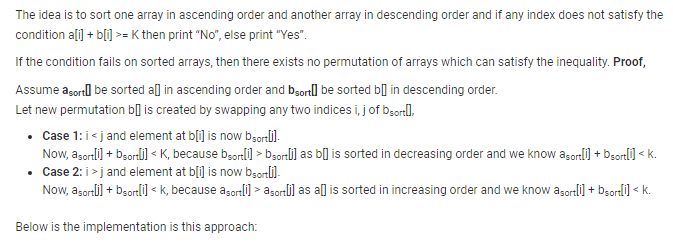

In [189]:
// Check whether any permutation  
// exists which satisfy the condition. 
static boolean isPossible(Integer a[], int b[], 
                                  int n, int k)  
{ 
    // Sort the array a[] in decreasing order. 
    Arrays.sort(a, Collections.reverseOrder()); 
  
    // Sort the array b[] in increasing order. 
    Arrays.sort(b); 
  
    // Checking condition on each index. 
    for (int i = 0; i < n; i++) 
    if (a[i] + b[i] < k) 
        return false; 
  
    return true; 
} 
  
// Driver code 
public static void main(String[] args) { 
    Integer a[] = {2, 1, 3}; 
    int b[] = {7, 8, 9}; 
    int k = 10; 
    int n = a.length; 
  
    if (isPossible(a, b, n, k)) 
    System.out.print("Yes"); 
    else
    System.out.print("No"); 
} 

main(args);

Yes

## **76. Find pair with greatest product in array**
https://www.geeksforgeeks.org/find-pair-with-greatest-product-in-array/

In [190]:
/*
Given an array of n elements, 
the task is to find the greatest number such that it is product of two elements of given array. 
If no such element exists, print -1. Elements are within the range of 1 to 10^5.
*/

In [191]:
/*
Examples :

Input :  arr[] = {10, 3, 5, 30, 35}
Output:  30
Explanation: 30 is the product of 10 and 3.

Input :  arr[] = {2, 5, 7, 8}
Output:  -1
Explanation: Since, no such element exists.

Input :  arr[] = {10, 2, 4, 30, 35}
Output:  -1

Input :  arr[] = {10, 2, 2, 4, 30, 35}
Output:  4

Input  : arr[] = {17, 2, 1, 35, 30}
Output : 35
*/

In [192]:
/*
A naive approach is to pick an element and then check for each pair product 
if equal to that number and update the max 
if the number is maximum,repeat until whole array gets traversed takes O(n^3) time.
*/

In [193]:
static int findGreatest( int []arr , int n) 
{ 
int result = -1; 
for (int i = 0; i < n ; i++) 
    for (int j = 0; j < n-1; j++) 
        for (int k = j+1 ; k < n ; k++) 
            if (arr[j] * arr[k] == arr[i]) 
                result = Math.max(result, arr[i]); 
return result; 
} 

// Driver code 
static public void main (String[] args) 
{ 
    int []arr = {30, 10, 9, 3, 35}; 
    int n = arr.length; 

    System.out.println(findGreatest(arr, n)); 
} 
main(args)

30


In [194]:
/*
Time Complexity : O(nlogn)

An efficient method follows below implementation:-

1. Create an empty hash table and store all array elements in it.
2. Sort the array in ascending order.
3. Pick elements one by one from end of the array.
4. And check if there exists a pair whose product is equal to that number. 
   In this efficiency can be achieved. 
   The idea is to reach till sqrt of that number. 
   If we don’t get the pair till sqrt that means no such pair exists. 
   We use hash table to make sure that we can find other element of pair in O(1) time.
5. Repeat steps 2 to 3 until we get the element or whole array gets traversed.
*/

In [195]:
// Function to find greatest number 
static int findGreatest(int arr[], int n)  
{ 
    // Store occurrences of all  
    // elements in hash array 
    Map<Integer, Integer> m = new HashMap<>(); 
    for (int i = 0; i < n; i++)  
    { 
        if (m.containsKey(arr[i]))  
        { 
            m.put(arr[i], m.get(arr[i]) + 1); 
        }  
        else 
        { 
            m.put(arr[i], m.get(arr[i])); 
        } 
    } 

    // m[arr[i]]++; 
    // Sort the array and traverse  
    // all elements from end. 
    Arrays.sort(arr); 

    for (int i = n - 1; i > 1; i--)  
    { 
        // For every element, check if there is another 
        // element which divides it. 
        for (int j = 0; j < i &&  
            arr[j] <= Math.sqrt(arr[i]); j++)  
        { 
            if (arr[i] % arr[j] == 0)  
            { 
                int result = arr[i] / arr[j]; 

                // Check if the result value exists in array 
                // or not if yes the return arr[i] 
                if (result != arr[j] &&  
                    m.get(result) == null|| m.get(result) > 0) 
                { 
                    return arr[i]; 
                }  

                // To handle the case like arr[i] = 4 
                // and arr[j] = 2 
                else if (result == arr[j] && m.get(result) > 1)  
                { 
                    return arr[i]; 
                } 
            } 
        } 
    } 
    return -1; 
} 

In [196]:
// Driver code 
public static void main(String[] args)  
{ 
    int arr[] = {17, 2, 1, 15, 30}; 
    int n = arr.length; 
    System.out.println(findGreatest(arr, n)); 
} 
main(args);

30


## **77. Minimum number of swaps required to sort an array**
https://www.geeksforgeeks.org/minimum-number-swaps-required-sort-array/

In [197]:
/*
Given an array of n distinct elements, 
find the minimum number of swaps required to sort the array.

Time Complexity: O(n Log n)
Auxiliary Space: O(n)
*/

In [198]:
/*
Examples:

Input : {4, 3, 2, 1}
Output : 2
Explanation : Swap index 0 with 3 and 1 with 2 to 
              form the sorted array {1, 2, 3, 4}.

Input : {1, 5, 4, 3, 2}
Output : 2
*/

In [199]:
/*
This can be easily done by visualizing the problem as a graph. 
We will have n nodes and an edge directed from node i to node j 
    if the element at i’th index must be present at j’th index in the sorted array.
    
Graph for {4, 3, 2, 1}
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/a-1.png"/>

In [200]:
/*
The graph will now contain many non-intersecting cycles. 
Now a cycle with 2 nodes will only require 1 swap to reach the correct ordering, 
similarly a cycle with 3 nodes will only require 2 swap to do so.

Graph for {4, 5, 2, 1, 5}
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/b-1.png"/>

In [201]:
/*
Hence,

ans = Σi = 1^k(cycle_size – 1)
where k is the number of cycles
*/

In [202]:
import javafx.util.Pair;

// Function returns the minimum number of swaps 
// required to sort the array 
public int minSwaps(int[] arr) 
{ 
    int n = arr.length; 

    // Create two arrays and use as pairs where first 
    // array is element and second array 
    // is position of first element 
    ArrayList <Pair <Integer, Integer> > arrpos = 
              new ArrayList <Pair <Integer, Integer> > (); 
    for (int i = 0; i < n; i++) 
         arrpos.add(new Pair <Integer, Integer> (arr[i], i)); 

    // Sort the array by array element values to 
    // get right position of every element as the 
    // elements of second array. 
    arrpos.sort(new Comparator<Pair<Integer, Integer>>() 
    { 
        @Override
        public int compare(Pair<Integer, Integer> o1, 
                           Pair<Integer, Integer> o2) 
        { 
            if (o1.getKey() > o2.getKey()) 
                return -1; 

            // We can change this to make it then look at the 
            // words alphabetical order 
            else if (o1.getKey().equals(o2.getKey())) 
                return 0; 

            else
                return 1; 
        } 
    }); 

    // To keep track of visited elements. Initialize 
    // all elements as not visited or false. 
    Boolean[] vis = new Boolean[n]; 
    Arrays.fill(vis, false); 

    // Initialize result 
    int ans = 0; 

    // Traverse array elements 
    for (int i = 0; i < n; i++) 
    { 
        // already swapped and corrected or 
        // already present at correct pos 
        if (vis[i] || arrpos.get(i).getValue() == i) 
            continue; 

        // find out the number of  node in 
        // this cycle and add in ans 
        int cycle_size = 0; 
        int j = i; 
        while (!vis[j]) 
        { 
            vis[j] = true; 

            // move to next node 
            j = arrpos.get(j).getValue(); 
            cycle_size++; 
        } 

        // Update answer by adding current cycle. 
        if(cycle_size > 0) 
        { 
            ans += (cycle_size - 1); 
        } 
    } 

    // Return result 
    return ans; 
} 

CompilationException: 

In [203]:
// Driver program to test the above function 
public static void main(String[] args) 
{ 
    int []a = {1, 5, 4, 3, 2}; 
    System.out.println(minSwaps(a)); 
}


**Additional Link**
***https://stackoverflow.com/questions/15152322/compute-the-minimal-number-of-swaps-to-order-a-sequence/15152602#15152602***